In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import numpy as np
import pandas as pd
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import os
from tqdm import tqdm
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.impute import KNNImputer
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
import lightgbm as lgb
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
from tqdm import tqdm
from imblearn.over_sampling import SMOTE
import numpy as np
import pandas as pd

/usr/local/lib/python3.10/dist-packages/dask/dataframe/__init__.py:42: FutureWarning: 
Dask dataframe query planning is disabled because dask-expr is not installed.

You can install it with `pip install dask[dataframe]` or `conda install dask`.
This will raise in a future version.

  warnings.warn(msg, FutureWarning)


In [ ]:
model_path = '/content/drive/MyDrive/ML files/alivemodel.joblib'

In [ ]:
import joblib

alivemodel = joblib.load(model_path)


In [ ]:
print(alivemodel)


{'RandomForest': RandomForestClassifier(class_weight='balanced', n_estimators=200,
                       random_state=42), 'XGBoost': XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.3, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=10, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=200, n_jobs=None, num_class=4,
              num_parallel_tree=None, ...), 'LightGBM': LGBMClassifier(learning_rate=0.3, n_estimators=200, num_leaves=100,
               objective='multiclass

In [ ]:
ytest_path = '/content/drive/MyDrive/ML files/ytest.joblib'

In [ ]:
Y_test = joblib.load(ytest_path)

In [ ]:
Y_test

{'ytest': 239789    3
 143272    3
 94970     0
 67323     3
 38260     2
          ..
 98352     3
 252789    3
 50401     3
 233913    1
 108642    3
 Name: Medal, Length: 53947, dtype: int64}

In [ ]:
Y_pred_gb =  alivemodel['Y_pred_gb']


In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.impute import KNNImputer
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV
from tqdm import tqdm
from imblearn.over_sampling import SMOTE
import numpy as np

In [ ]:
# Load the correct Y_test data, verify the path and file content.
Y_test = joblib.load(ytest_path)

# Access the NumPy array within the dictionary
Y_test = Y_test['ytest']

# Check the shape of Y_test to ensure it matches the expected dimensions.
print(Y_test.shape)

# Verify the source and assignment of Y_pred_gb to ensure it contains the predicted values.
print(Y_pred_gb.shape)

# Print the classification report.
print("Classification Report for Gradient Boosting:")
print(classification_report(Y_test, Y_pred_gb))

(53947,)
(53947,)
Classification Report for Gradient Boosting:
              precision    recall  f1-score   support

           0       0.53      0.19      0.28      2672
           1       0.55      0.37      0.44      2736
           2       0.49      0.17      0.25      2596
           3       0.89      0.98      0.93     45943

    accuracy                           0.87     53947
   macro avg       0.62      0.43      0.48     53947
weighted avg       0.84      0.87      0.84     53947



In [ ]:
pred_path = '/content/drive/MyDrive/ML files/pred (1).joblib'
pred = joblib.load(pred_path)

In [ ]:
best_rf = alivemodel['RandomForest']
best_xgb = alivemodel['XGBoost']
best_lgbm = alivemodel['LightGBM']
lr = alivemodel['LogisticRegression']
best_knn = alivemodel['KNN']
nb = alivemodel['NaiveBayes']
best_nn = alivemodel['NeuralNetwork']
best_ada = alivemodel['AdaBoost']
best_gb = alivemodel['GradientBoosting']
Y_pred_rf = pred['Y_pred_rf']
Y_pred_lgbm = pred['Y_pred_lgbm']
Y_pred_knn = pred['Y_pred_knn']
Y_pred_nb = pred['Y_pred_nb']
Y_pred_nn = pred['Y_pred_nn']
Y_pred_ada = pred['Y_pred_ada']
Y_pred_gb = pred['Y_pred_gb']
Y_pred_xgb = pred['Y_pred_xgb']
Y_pred_lr = pred['Y_pred_lr']

In [ ]:
print("Classification Report for Y_pred_rf:")
print(classification_report(Y_test, Y_pred_rf))

print("Classification Report for Y_pred_lgbm:")
print(classification_report(Y_test, Y_pred_lgbm))

print("Classification Report for Y_pred_knn:")
print(classification_report(Y_test, Y_pred_knn))

print("Classification Report for Y_pred_nb:")
print(classification_report(Y_test, Y_pred_nb))

print("Classification Report for Y_pred_nn:")
print(classification_report(Y_test, Y_pred_nn))

print("Classification Report for Y_pred_ada:")
print(classification_report(Y_test, Y_pred_ada))

print("Classification Report for Y_pred_gb:")
print(classification_report(Y_test, Y_pred_gb))

print("Classification Report for Y_pred_xgb:")
print(classification_report(Y_test, Y_pred_xgb))

print("Classification Report for Y_pred_lr:")
print(classification_report(Y_test, Y_pred_lr))

Classification Report for Y_pred_rf:
              precision    recall  f1-score   support

           0       0.41      0.30      0.35      2672
           1       0.52      0.44      0.47      2736
           2       0.42      0.33      0.37      2596
           3       0.91      0.95      0.93     45943

    accuracy                           0.86     53947
   macro avg       0.57      0.50      0.53     53947
weighted avg       0.84      0.86      0.85     53947

Classification Report for Y_pred_lgbm:
              precision    recall  f1-score   support

           0       0.53      0.23      0.32      2672
           1       0.58      0.42      0.49      2736
           2       0.50      0.25      0.34      2596
           3       0.90      0.97      0.94     45943

    accuracy                           0.87     53947
   macro avg       0.63      0.47      0.52     53947
weighted avg       0.85      0.87      0.85     53947

Classification Report for Y_pred_knn:
              pr

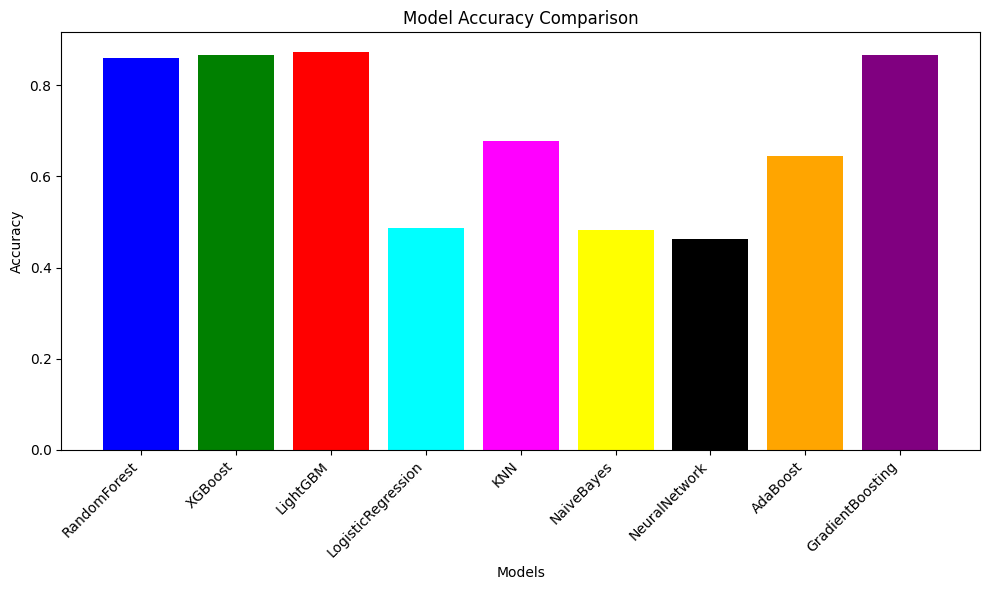

In [ ]:
import matplotlib.pyplot as plt

# Assuming accuracy scores for each model stored in a dictionary or list
model_names = ['RandomForest', 'XGBoost', 'LightGBM', 'LogisticRegression', 'KNN', 'NaiveBayes', 'NeuralNetwork', 'AdaBoost', 'GradientBoosting']
accuracy_scores = [
    accuracy_score(Y_test, Y_pred_rf),
    accuracy_score(Y_test, Y_pred_xgb),
    accuracy_score(Y_test, Y_pred_lgbm),
    accuracy_score(Y_test, Y_pred_lr),
    accuracy_score(Y_test, Y_pred_knn),
    accuracy_score(Y_test, Y_pred_nb),
    accuracy_score(Y_test, Y_pred_nn),
    accuracy_score(Y_test, Y_pred_ada),
    accuracy_score(Y_test, Y_pred_gb)
]

# Create a bar chart
plt.figure(figsize=(10, 6))
plt.bar(model_names, accuracy_scores, color=['blue', 'green', 'red', 'cyan', 'magenta', 'yellow', 'black', 'orange', 'purple'])
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Model Accuracy Comparison')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


In [ ]:
data_2024 = pd.read_csv('/content/drive/MyDrive/ML files/final table for 2024.csv')


In [ ]:
backup2 = data_2024.copy()

In [ ]:
data_2024.head()


,Sex,NOC,Height,Weight,Age,Season,City,Year,Event,Medal
0,M,ARM,0.0,0.0,33.0,Summer,Paris,2024,"Wrestling ""Mens Greco-Roman 97kg""",Silver
1,M,ARM,0.0,0.0,25.0,Summer,Paris,2024,"Wrestling ""Mens Greco-Roman 77kg""",Bronze
2,M,ARM,0.0,0.0,28.0,Summer,Paris,2024,"Wrestling ""Mens Greco-Roman 67kg""",NaN
3,M,ARM,0.0,0.0,25.0,Summer,Paris,2024,"Wrestling ""Mens Freestyle 57kg""",NaN
4,M,ARM,0.0,0.0,25.0,Summer,Paris,2024,"Wrestling ""Mens Freestyle 65kg""",NaN


In [ ]:
duplicate_count = data_2024.duplicated().sum()
print(f"Number of duplicate rows: {duplicate_count}")


Number of duplicate rows: 419


In [ ]:
data_2024 = data_2024.drop_duplicates()

In [ ]:
duplicate_count = data_2024.duplicated().sum()
print(f"Number of duplicate rows: {duplicate_count}")

Number of duplicate rows: 0


In [ ]:
data_2024.shape


(10746, 10)

In [ ]:
backup = data_2024.copy()

In [ ]:
data_2024.head(50)

,Sex,NOC,Height,Weight,Age,Season,City,Year,Event,Medal
0,M,ARM,0.0,0.0,33.0,Summer,Paris,2024,"Wrestling ""Mens Greco-Roman 97kg""",Silver
1,M,ARM,0.0,0.0,25.0,Summer,Paris,2024,"Wrestling ""Mens Greco-Roman 77kg""",Bronze
2,M,ARM,0.0,0.0,28.0,Summer,Paris,2024,"Wrestling ""Mens Greco-Roman 67kg""",NaN
3,M,ARM,0.0,0.0,25.0,Summer,Paris,2024,"Wrestling ""Mens Freestyle 57kg""",NaN
4,M,ARM,0.0,0.0,25.0,Summer,Paris,2024,"Wrestling ""Mens Freestyle 65kg""",NaN
5,F,COL,162.0,0.0,31.0,Summer,Paris,2024,"Athletics ""Womens 20km Race Walk"", Marathon Ra...",NaN
6,M,JAM,0.0,0.0,35.0,Summer,Paris,2024,Judo Men -60 kg,NaN
7,F,GAM,161.0,0.0,29.0,Summer,Paris,2024,"Athletics ""Womens 100m"", ""Womens 200m""",NaN
8,M,GAM,178.0,0.0,28.0,Summer,Paris,2024,"Athletics ""Mens 100m""",NaN
9,F,MEX,0.0,0.0,30.0,Summer,Paris,2024,"Triathlon ""Womens Individual""",NaN


In [ ]:
from sklearn.preprocessing import LabelEncoder

# Initialize the LabelEncoder
label_encoder = LabelEncoder()

# Convert categorical columns to numeric
backup['Sex'] = label_encoder.fit_transform(backup['Sex'])
backup['NOC'] = label_encoder.fit_transform(backup['NOC'])
backup['Season'] = label_encoder.fit_transform(backup['Season'])
backup['City'] = label_encoder.fit_transform(backup['City'])
backup['Event'] = label_encoder.fit_transform(backup['Event'])
backup['Medal'] = label_encoder.fit_transform(backup['Medal'])

# Display the first few rows of the transformed dataframe
backup.head()

,Sex,NOC,Height,Weight,Age,Season,City,Year,Event,Medal
0,1,8,0.0,0.0,33.0,0,0,2024,675,2
1,1,8,0.0,0.0,25.0,0,0,2024,673,0
2,1,8,0.0,0.0,28.0,0,0,2024,672,3
3,1,8,0.0,0.0,25.0,0,0,2024,665,3
4,1,8,0.0,0.0,25.0,0,0,2024,666,3


In [ ]:
from sklearn.preprocessing import LabelEncoder

# Initialize the LabelEncoder
label_encoder = LabelEncoder()


# Encode and print the mapping for each column
columns_to_encode = ['Sex', 'NOC', 'Season', 'City', 'Event', 'Medal']
for column in columns_to_encode:
    backup[column] = label_encoder.fit_transform(backup[column])
    # Print the mapping
    print(f"Mapping for {column}:")
    for class_label, numeric_label in zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)):
        print(f"{class_label} -> {numeric_label}")
    print("\n")

# Display the first few rows of the transformed dataframe
backup.head(50)

Mapping for Sex:
0 -> 0
1 -> 1


Mapping for NOC:
0 -> 0
1 -> 1
2 -> 2
3 -> 3
4 -> 4
5 -> 5
6 -> 6
7 -> 7
8 -> 8
9 -> 9
10 -> 10
11 -> 11
12 -> 12
13 -> 13
14 -> 14
15 -> 15
16 -> 16
17 -> 17
18 -> 18
19 -> 19
20 -> 20
21 -> 21
22 -> 22
23 -> 23
24 -> 24
25 -> 25
26 -> 26
27 -> 27
28 -> 28
29 -> 29
30 -> 30
31 -> 31
32 -> 32
33 -> 33
34 -> 34
35 -> 35
36 -> 36
37 -> 37
38 -> 38
39 -> 39
40 -> 40
41 -> 41
42 -> 42
43 -> 43
44 -> 44
45 -> 45
46 -> 46
47 -> 47
48 -> 48
49 -> 49
50 -> 50
51 -> 51
52 -> 52
53 -> 53
54 -> 54
55 -> 55
56 -> 56
57 -> 57
58 -> 58
59 -> 59
60 -> 60
61 -> 61
62 -> 62
63 -> 63
64 -> 64
65 -> 65
66 -> 66
67 -> 67
68 -> 68
69 -> 69
70 -> 70
71 -> 71
72 -> 72
73 -> 73
74 -> 74
75 -> 75
76 -> 76
77 -> 77
78 -> 78
79 -> 79
80 -> 80
81 -> 81
82 -> 82
83 -> 83
84 -> 84
85 -> 85
86 -> 86
87 -> 87
88 -> 88
89 -> 89
90 -> 90
91 -> 91
92 -> 92
93 -> 93
94 -> 94
95 -> 95
96 -> 96
97 -> 97
98 -> 98
99 -> 99
100 -> 100
101 -> 101
102 -> 102
103 -> 103
104 -> 104
105 -> 105
106 

,Sex,NOC,Height,Weight,Age,Season,City,Year,Event,Medal
0,1,8,0.0,0.0,33.0,0,0,2024,675,2
1,1,8,0.0,0.0,25.0,0,0,2024,673,0
2,1,8,0.0,0.0,28.0,0,0,2024,672,3
3,1,8,0.0,0.0,25.0,0,0,2024,665,3
4,1,8,0.0,0.0,25.0,0,0,2024,666,3
5,0,43,162.0,0.0,31.0,0,0,2024,100,3
6,1,95,0.0,0.0,35.0,0,0,2024,293,3
7,0,68,161.0,0.0,29.0,0,0,2024,88,3
8,1,68,178.0,0.0,28.0,0,0,2024,40,3
9,0,122,0.0,0.0,30.0,0,0,2024,648,3


In [ ]:
# Load encoded data for 2024 (assumed to be in backup variable)
X_2024 = backup['Medal']

# Make predictions using each model
medal_count_rf = best_rf.predict(X_2024)
medal_count_xgb = best_xgb.predict(X_2024)
medal_count_lgbm = best_lgbm.predict(X_2024)
medal_count_lr = lr.predict(X_2024)
medal_count_knn = best_knn.predict(X_2024)
medal_count_nb = nb.predict(X_2024)
medal_count_nn = best_nn.predict(X_2024)
medal_count_ada = best_ada.predict(X_2024)
medal_count_gb = best_gb.predict(X_2024)

final_predictions = medal_count_rf

# Store results or print the predicted medal counts for each NOC
print(final_predictions)


ValueError: Expected 2D array, got 1D array instead:
array=[2. 0. 3. ... 3. 3. 3.].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [ ]:
X_2024 = backup[['Sex', 'Age', 'Height', 'Weight', 'NOC', 'Season', 'City', 'Event']]


# Convert categorical columns to numeric using the same label encoders used during training (if needed).
label_encoder = LabelEncoder()

# Convert categorical columns to numeric
columns_to_encode = ['Sex', 'NOC', 'Season', 'City', 'Event']
for column in columns_to_encode:
    X_2024[column] = label_encoder.fit_transform(X_2024[column])

# Convert X_2024 to numpy array for model prediction.
X_2024 = np.array(X_2024)

# Check X_2024 shape.
print(X_2024.shape)


# Predict the medal count for each NOC in 2024 using the best_gb model.
medal_count_2024 = best_gb.predict(X_2024)


# Store the results or print the predicted medal counts for each NOC.
print(medal_count_2024)

# Validate the predicted values against the actual Medal values for 2024.

accuracy = accuracy_score(backup['Medal'], medal_count_2024)
print(f"Accuracy of the best_gb model on the 2024 data: {accuracy}")

In [ ]:
backup2.head()

,Sex,NOC,Height,Weight,Age,Season,City,Year,Event,Medal
0,M,ARM,0.0,0.0,33.0,Summer,Paris,2024,"Wrestling ""Mens Greco-Roman 97kg""",Silver
1,M,ARM,0.0,0.0,25.0,Summer,Paris,2024,"Wrestling ""Mens Greco-Roman 77kg""",Bronze
2,M,ARM,0.0,0.0,28.0,Summer,Paris,2024,"Wrestling ""Mens Greco-Roman 67kg""",NaN
3,M,ARM,0.0,0.0,25.0,Summer,Paris,2024,"Wrestling ""Mens Freestyle 57kg""",NaN
4,M,ARM,0.0,0.0,25.0,Summer,Paris,2024,"Wrestling ""Mens Freestyle 65kg""",NaN


In [ ]:
import pandas as pd
import joblib
import sklearn
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer # Import the SimpleImputer

# Initialize the LabelEncoder
label_encoder = LabelEncoder()
scaler = StandardScaler()

# Fit the label encoder and then transform the data
backup2['Sex'] = label_encoder.fit_transform(backup2['Sex'])
backup2['NOC'] = label_encoder.fit_transform(backup2['NOC'])
backup2['Season'] = label_encoder.fit_transform(backup2['Season'])
backup2['City'] = label_encoder.fit_transform(backup2['City'])
backup2['Event'] = label_encoder.fit_transform(backup2['Event'])

#Select only the numeric columns for scaling
numeric_columns = backup2.select_dtypes(include=['number']).columns

# Handle missing values using SimpleImputer
imputer = SimpleImputer(strategy='mean') # Initialize SimpleImputer with a strategy
backup2[numeric_columns] = imputer.fit_transform(backup2[numeric_columns]) # Impute missing values

# Scale the data using only numeric columns
backup2_scaled = scaler.fit_transform(backup2[numeric_columns])

#Ensure backup2_scaled is a DataFrame with the same numeric columns
backup2_scaled = pd.DataFrame(backup2_scaled, columns=numeric_columns)

predictions_2024 = best_gb.predict(backup2_scaled)

# Map the numeric predictions back to medal categories
medal_mapping = {3: 'NaN', 0: 'Bronze', 2: 'Silver', 1: 'Gold'}
predicted_medals = [medal_mapping[pred] for pred in predictions_2024]

# Add the predictions to the original dataframe
backup2['Predicted_Medal'] = predicted_medals

# Display the first few rows of the dataframe with predictions
backup2.head(50)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:458: UserWarning: X has feature names, but GradientBoostingClassifier was fitted without feature names
  warnings.warn(


,Sex,NOC,Height,Weight,Age,Season,City,Year,Event,Medal,Predicted_Medal
0,1.0,8.0,0.0,0.0,33.0,0.0,0.0,2024.0,675.0,Silver,Bronze
1,1.0,8.0,0.0,0.0,25.0,0.0,0.0,2024.0,673.0,Bronze,Bronze
2,1.0,8.0,0.0,0.0,28.0,0.0,0.0,2024.0,672.0,NaN,Bronze
3,1.0,8.0,0.0,0.0,25.0,0.0,0.0,2024.0,665.0,NaN,Bronze
4,1.0,8.0,0.0,0.0,25.0,0.0,0.0,2024.0,666.0,NaN,Bronze
5,0.0,43.0,162.0,0.0,31.0,0.0,0.0,2024.0,100.0,NaN,Silver
6,1.0,95.0,0.0,0.0,35.0,0.0,0.0,2024.0,293.0,NaN,Silver
7,0.0,68.0,161.0,0.0,29.0,0.0,0.0,2024.0,88.0,NaN,Silver
8,1.0,68.0,178.0,0.0,28.0,0.0,0.0,2024.0,40.0,NaN,Gold
9,0.0,122.0,0.0,0.0,30.0,0.0,0.0,2024.0,648.0,NaN,Bronze


In [ ]:
import pandas as pd
import joblib
import sklearn
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer # Import the SimpleImputer

# Initialize the LabelEncoder
label_encoder = LabelEncoder()
scaler = StandardScaler()

# Fit the label encoder and then transform the data
backup2['Sex'] = label_encoder.fit_transform(backup2['Sex'])
backup2['NOC'] = label_encoder.fit_transform(backup2['NOC'])
backup2['Season'] = label_encoder.fit_transform(backup2['Season'])
backup2['City'] = label_encoder.fit_transform(backup2['City'])
backup2['Event'] = label_encoder.fit_transform(backup2['Event'])

#Select only the numeric columns for scaling
numeric_columns = backup2.select_dtypes(include=['number']).columns

# Handle missing values using SimpleImputer
imputer = SimpleImputer(strategy='mean') # Initialize SimpleImputer with a strategy
backup2[numeric_columns] = imputer.fit_transform(backup2[numeric_columns]) # Impute missing values

# Scale the data using only numeric columns
backup2_scaled = scaler.fit_transform(backup2[numeric_columns])

#Ensure backup2_scaled is a DataFrame with the same numeric columns
backup2_scaled = pd.DataFrame(backup2_scaled, columns=numeric_columns)

predictions_2024 = nb.predict(backup2_scaled)

# Map the numeric predictions back to medal categories
medal_mapping = {3: 'NaN', 0: 'Bronze', 2: 'Silver', 1: 'Gold'}
predicted_medals = [medal_mapping[pred] for pred in predictions_2024]

# Add the predictions to the original dataframe
backup2['Predicted_Medal'] = predicted_medals

# Display the first few rows of the dataframe with predictions
backup2.head(50)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:458: UserWarning: X has feature names, but GaussianNB was fitted without feature names
  warnings.warn(


,Sex,NOC,Height,Weight,Age,Season,City,Year,Event,Medal,Predicted_Medal
0,1.0,8.0,0.0,0.0,33.0,0.0,0.0,2024.0,675.0,Silver,NaN
1,1.0,8.0,0.0,0.0,25.0,0.0,0.0,2024.0,673.0,Bronze,NaN
2,1.0,8.0,0.0,0.0,28.0,0.0,0.0,2024.0,672.0,NaN,NaN
3,1.0,8.0,0.0,0.0,25.0,0.0,0.0,2024.0,665.0,NaN,NaN
4,1.0,8.0,0.0,0.0,25.0,0.0,0.0,2024.0,666.0,NaN,NaN
5,0.0,43.0,162.0,0.0,31.0,0.0,0.0,2024.0,100.0,NaN,NaN
6,1.0,95.0,0.0,0.0,35.0,0.0,0.0,2024.0,293.0,NaN,Gold
7,0.0,68.0,161.0,0.0,29.0,0.0,0.0,2024.0,88.0,NaN,NaN
8,1.0,68.0,178.0,0.0,28.0,0.0,0.0,2024.0,40.0,NaN,NaN
9,0.0,122.0,0.0,0.0,30.0,0.0,0.0,2024.0,648.0,NaN,Bronze


In [ ]:
backup2.head()

,Sex,NOC,Height,Weight,Age,Season,City,Year,Event,Medal,Predicted_Medal
0,1.0,8.0,0.0,0.0,33.0,0.0,0.0,2024.0,675.0,Silver,NaN
1,1.0,8.0,0.0,0.0,25.0,0.0,0.0,2024.0,673.0,Bronze,NaN
2,1.0,8.0,0.0,0.0,28.0,0.0,0.0,2024.0,672.0,NaN,NaN
3,1.0,8.0,0.0,0.0,25.0,0.0,0.0,2024.0,665.0,NaN,NaN
4,1.0,8.0,0.0,0.0,25.0,0.0,0.0,2024.0,666.0,NaN,NaN


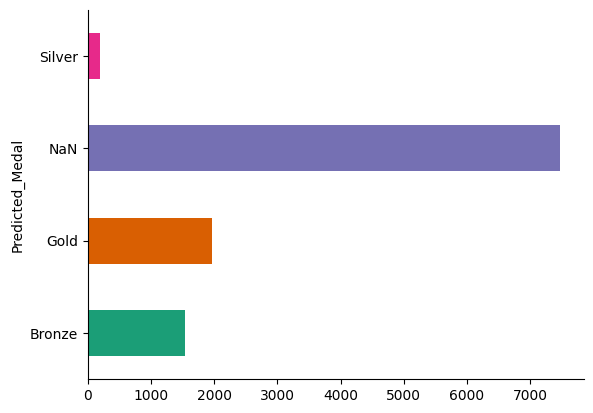

In [ ]:
from matplotlib import pyplot as plt
import seaborn as sns
backup2.groupby('Predicted_Medal').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

In [ ]:
import altair as alt

# Create a count of actual medal vs predicted medal
medal_counts = backup2.groupby(['Medal', 'Predicted_Medal']).size().reset_index(name='Count')

# Create the Altair chart
chart = alt.Chart(medal_counts).mark_bar().encode(
    x='Medal',
    y='Predicted_Medal',
    color='Count'
).properties(
    title='Actual Medal vs Predicted Medal'
)

chart


/usr/local/lib/python3.10/dist-packages/altair/utils/core.py:384: FutureWarning: the convert_dtype parameter is deprecated and will be removed in a future version.  Do ``ser.astype(object).apply()`` instead if you want ``convert_dtype=False``.
  col = df[col_name].apply(to_list_if_array, convert_dtype=False)


alt.Chart(...)

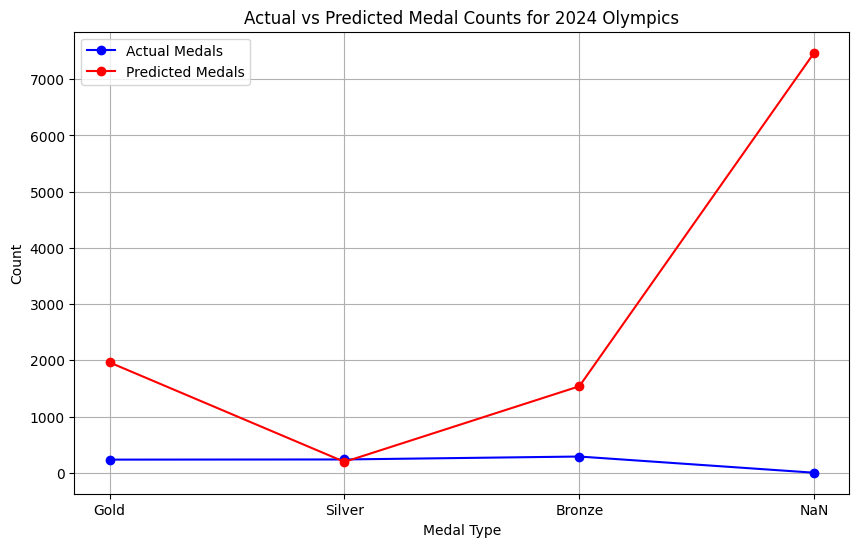

In [ ]:
import matplotlib.pyplot as plt

# Count the number of each type of medal in actual and predicted data
actual_medal_counts = backup2['Medal'].value_counts().reindex(['Gold', 'Silver', 'Bronze', 'NaN'], fill_value=0)
predicted_medal_counts = backup2['Predicted_Medal'].value_counts().reindex(['Gold', 'Silver', 'Bronze', 'NaN'], fill_value=0)

# Create a DataFrame for plotting
medal_comparison = pd.DataFrame({
    'Actual': actual_medal_counts,
    'Predicted': predicted_medal_counts
})

# Plot the line graph
plt.figure(figsize=(10, 6))
plt.plot(medal_comparison.index, medal_comparison['Actual'], marker='o', label='Actual Medals', color='blue')
plt.plot(medal_comparison.index, medal_comparison['Predicted'], marker='o', label='Predicted Medals', color='red')
plt.xlabel('Medal Type')
plt.ylabel('Count')
plt.title('Actual vs Predicted Medal Counts for 2024 Olympics')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
best_xgb_data = data_2024.copy()

In [ ]:
import pandas as pd
import joblib
import sklearn
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer # Import the SimpleImputer

# Initialize the LabelEncoder
label_encoder = LabelEncoder()
scaler = StandardScaler()

# Fit the label encoder and then transform the data
best_xgb_data['Sex'] = label_encoder.fit_transform(best_xgb_data['Sex'])
best_xgb_data['NOC'] = label_encoder.fit_transform(best_xgb_data['NOC'])
best_xgb_data['Season'] = label_encoder.fit_transform(best_xgb_data['Season'])
best_xgb_data['City'] = label_encoder.fit_transform(best_xgb_data['City'])
best_xgb_data['Event'] = label_encoder.fit_transform(best_xgb_data['Event'])

#Select only the numeric columns for scaling
numeric_columns = best_xgb_data.select_dtypes(include=['number']).columns

# Handle missing values using SimpleImputer
imputer = SimpleImputer(strategy='mean') # Initialize SimpleImputer with a strategy
best_xgb_data[numeric_columns] = imputer.fit_transform(best_xgb_data[numeric_columns]) # Impute missing values

# Scale the data using only numeric columns
best_xgb_data_scaled = scaler.fit_transform(best_xgb_data[numeric_columns])

#Ensure backup2_scaled is a DataFrame with the same numeric columns
best_xgb_data_scaled = pd.DataFrame(best_xgb_data_scaled, columns=numeric_columns)

predictions_2024 = best_xgb.predict(best_xgb_data_scaled)

# Map the numeric predictions back to medal categories
medal_mapping = {3: 'NaN', 0: 'Bronze', 2: 'Silver', 1: 'Gold'}
predicted_medals = [medal_mapping[pred] for pred in predictions_2024]

# Add the predictions to the original dataframe
best_xgb_data['Predicted_Medal'] = predicted_medals

# Display the first few rows of the dataframe with predictions
best_xgb_data.head(50)


,Sex,NOC,Height,Weight,Age,Season,City,Year,Event,Medal,Predicted_Medal
0,1.0,8.0,0.0,0.0,33.0,0.0,0.0,2024.0,675.0,Silver,Silver
1,1.0,8.0,0.0,0.0,25.0,0.0,0.0,2024.0,673.0,Bronze,Silver
2,1.0,8.0,0.0,0.0,28.0,0.0,0.0,2024.0,672.0,NaN,NaN
3,1.0,8.0,0.0,0.0,25.0,0.0,0.0,2024.0,665.0,NaN,Silver
4,1.0,8.0,0.0,0.0,25.0,0.0,0.0,2024.0,666.0,NaN,Silver
5,0.0,43.0,162.0,0.0,31.0,0.0,0.0,2024.0,100.0,NaN,Silver
6,1.0,95.0,0.0,0.0,35.0,0.0,0.0,2024.0,293.0,NaN,Gold
7,0.0,68.0,161.0,0.0,29.0,0.0,0.0,2024.0,88.0,NaN,Gold
8,1.0,68.0,178.0,0.0,28.0,0.0,0.0,2024.0,40.0,NaN,Silver
9,0.0,122.0,0.0,0.0,30.0,0.0,0.0,2024.0,648.0,NaN,Bronze


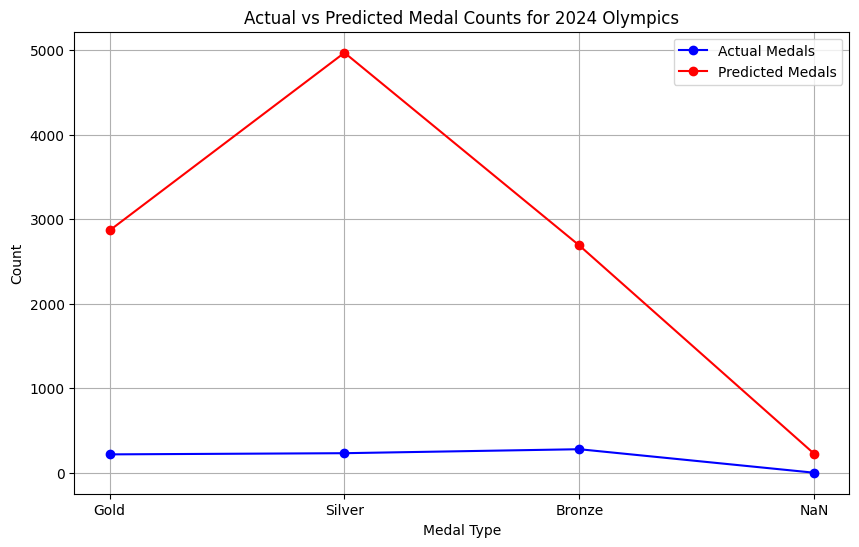

In [ ]:
import matplotlib.pyplot as plt

# Count the number of each type of medal in actual and predicted data
actual_medal_counts = best_xgb_data['Medal'].value_counts().reindex(['Gold', 'Silver', 'Bronze', 'NaN'], fill_value=0)
predicted_medal_counts = best_xgb_data['Predicted_Medal'].value_counts().reindex(['Gold', 'Silver', 'Bronze', 'NaN'], fill_value=0)

# Create a DataFrame for plotting
medal_comparison = pd.DataFrame({
    'Actual': actual_medal_counts,
    'Predicted': predicted_medal_counts
})

# Plot the line graph
plt.figure(figsize=(10, 6))
plt.plot(medal_comparison.index, medal_comparison['Actual'], marker='o', label='Actual Medals', color='blue')
plt.plot(medal_comparison.index, medal_comparison['Predicted'], marker='o', label='Predicted Medals', color='red')
plt.xlabel('Medal Type')
plt.ylabel('Count')
plt.title('Actual vs Predicted Medal Counts for 2024 Olympics')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
best_rf_data = data_2024.copy()

In [ ]:
import pandas as pd
import joblib
import sklearn
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer # Import the SimpleImputer

# Initialize the LabelEncoder
label_encoder = LabelEncoder()
scaler = StandardScaler()

# Fit the label encoder and then transform the data
best_rf_data['Sex'] = label_encoder.fit_transform(best_rf_data['Sex'])
best_rf_data['NOC'] = label_encoder.fit_transform(best_rf_data['NOC'])
best_rf_data['Season'] = label_encoder.fit_transform(best_rf_data['Season'])
best_rf_data['City'] = label_encoder.fit_transform(best_rf_data['City'])
best_rf_data['Event'] = label_encoder.fit_transform(best_rf_data['Event'])

#Select only the numeric columns for scaling
numeric_columns = best_rf_data.select_dtypes(include=['number']).columns

# Handle missing values using SimpleImputer
imputer = SimpleImputer(strategy='mean') # Initialize SimpleImputer with a strategy
best_rf_data[numeric_columns] = imputer.fit_transform(best_rf_data[numeric_columns]) # Impute missing values

# Scale the data using only numeric columns
best_rf_data_scaled = scaler.fit_transform(best_rf_data[numeric_columns])

#Ensure backup2_scaled is a DataFrame with the same numeric columns
best_rf_data_scaled = pd.DataFrame(best_rf_data_scaled, columns=numeric_columns)

predictions_2024 = best_rf.predict(best_rf_data_scaled)

# Map the numeric predictions back to medal categories
medal_mapping = {3: 'NaN', 0: 'Bronze', 2: 'Silver', 1: 'Gold'}
predicted_medals = [medal_mapping[pred] for pred in predictions_2024]

# Add the predictions to the original dataframe
best_rf_data['Predicted_Medal'] = predicted_medals

# Display the first few rows of the dataframe with predictions
best_rf_data.head(50)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:458: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


,Sex,NOC,Height,Weight,Age,Season,City,Year,Event,Medal,Predicted_Medal
0,1.0,8.0,0.0,0.0,33.0,0.0,0.0,2024.0,675.0,Silver,NaN
1,1.0,8.0,0.0,0.0,25.0,0.0,0.0,2024.0,673.0,Bronze,NaN
2,1.0,8.0,0.0,0.0,28.0,0.0,0.0,2024.0,672.0,NaN,NaN
3,1.0,8.0,0.0,0.0,25.0,0.0,0.0,2024.0,665.0,NaN,NaN
4,1.0,8.0,0.0,0.0,25.0,0.0,0.0,2024.0,666.0,NaN,NaN
5,0.0,43.0,162.0,0.0,31.0,0.0,0.0,2024.0,100.0,NaN,Silver
6,1.0,95.0,0.0,0.0,35.0,0.0,0.0,2024.0,293.0,NaN,Silver
7,0.0,68.0,161.0,0.0,29.0,0.0,0.0,2024.0,88.0,NaN,Silver
8,1.0,68.0,178.0,0.0,28.0,0.0,0.0,2024.0,40.0,NaN,Bronze
9,0.0,122.0,0.0,0.0,30.0,0.0,0.0,2024.0,648.0,NaN,Bronze


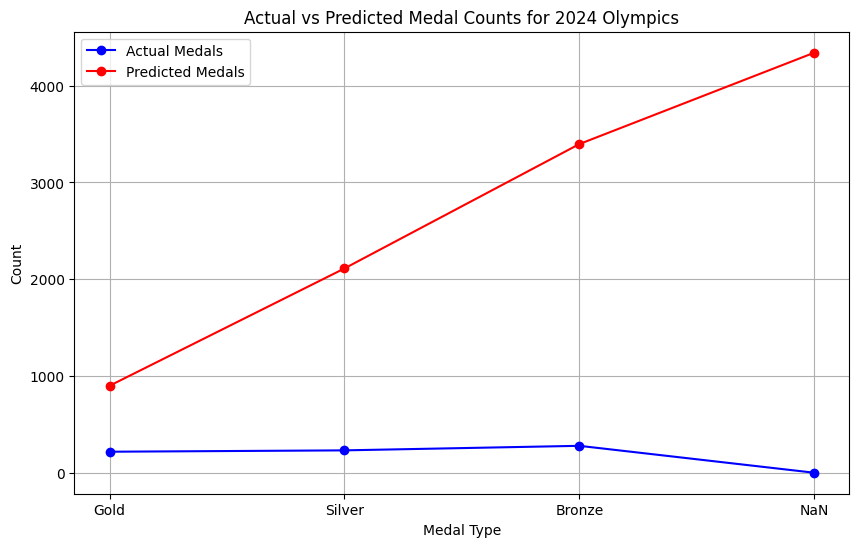

In [ ]:
import matplotlib.pyplot as plt
# Count the number of each type of medal in actual and predicted data
actual_medal_counts = best_rf_data['Medal'].value_counts().reindex(['Gold', 'Silver', 'Bronze', 'NaN'], fill_value=0)
predicted_medal_counts = best_rf_data['Predicted_Medal'].value_counts().reindex(['Gold', 'Silver', 'Bronze', 'NaN'], fill_value=0)

# Create a DataFrame for plotting
medal_comparison = pd.DataFrame({
    'Actual': actual_medal_counts,
    'Predicted': predicted_medal_counts
})

# Plot the line graph
plt.figure(figsize=(10, 6))
plt.plot(medal_comparison.index, medal_comparison['Actual'], marker='o', label='Actual Medals', color='blue')
plt.plot(medal_comparison.index, medal_comparison['Predicted'], marker='o', label='Predicted Medals', color='red')
plt.xlabel('Medal Type')
plt.ylabel('Count')
plt.title('Actual vs Predicted Medal Counts for 2024 Olympics')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
best_lr_data = data_2024.copy()

In [ ]:
import pandas as pd
import joblib
import sklearn
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer # Import the SimpleImputer

# Initialize the LabelEncoder
label_encoder = LabelEncoder()
scaler = StandardScaler()

# Fit the label encoder and then transform the data
best_lr_data['Sex'] = label_encoder.fit_transform(best_lr_data['Sex'])
best_lr_data['NOC'] = label_encoder.fit_transform(best_lr_data['NOC'])
best_lr_data['Season'] = label_encoder.fit_transform(best_lr_data['Season'])
best_lr_data['City'] = label_encoder.fit_transform(best_lr_data['City'])
best_lr_data['Event'] = label_encoder.fit_transform(best_lr_data['Event'])

#Select only the numeric columns for scaling
numeric_columns = best_lr_data.select_dtypes(include=['number']).columns

# Handle missing values using SimpleImputer
imputer = SimpleImputer(strategy='mean') # Initialize SimpleImputer with a strategy
best_lr_data[numeric_columns] = imputer.fit_transform(best_lr_data[numeric_columns]) # Impute missing values

# Scale the data using only numeric columns
best_lr_data_scaled = scaler.fit_transform(best_lr_data[numeric_columns])

#Ensure backup2_scaled is a DataFrame with the same numeric columns
best_lr_data_scaled = pd.DataFrame(best_lr_data_scaled, columns=numeric_columns)

predictions_2024 = lr.predict(best_lr_data_scaled)

# Map the numeric predictions back to medal categories
medal_mapping = {3: 'NaN', 0: 'Bronze', 2: 'Silver', 1: 'Gold'}
predicted_medals = [medal_mapping[pred] for pred in predictions_2024]

# Add the predictions to the original dataframe
best_lr_data['Predicted_Medal'] = predicted_medals

# Display the first few rows of the dataframe with predictions
best_lr_data.head(50)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:458: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


,Sex,NOC,Height,Weight,Age,Season,City,Year,Event,Medal,Predicted_Medal
0,1.0,8.0,0.0,0.0,33.0,0.0,0.0,2024.0,675.0,Silver,NaN
1,1.0,8.0,0.0,0.0,25.0,0.0,0.0,2024.0,673.0,Bronze,NaN
2,1.0,8.0,0.0,0.0,28.0,0.0,0.0,2024.0,672.0,NaN,NaN
3,1.0,8.0,0.0,0.0,25.0,0.0,0.0,2024.0,665.0,NaN,NaN
4,1.0,8.0,0.0,0.0,25.0,0.0,0.0,2024.0,666.0,NaN,NaN
5,0.0,43.0,162.0,0.0,31.0,0.0,0.0,2024.0,100.0,NaN,Gold
6,1.0,95.0,0.0,0.0,35.0,0.0,0.0,2024.0,293.0,NaN,NaN
7,0.0,68.0,161.0,0.0,29.0,0.0,0.0,2024.0,88.0,NaN,Gold
8,1.0,68.0,178.0,0.0,28.0,0.0,0.0,2024.0,40.0,NaN,NaN
9,0.0,122.0,0.0,0.0,30.0,0.0,0.0,2024.0,648.0,NaN,Gold


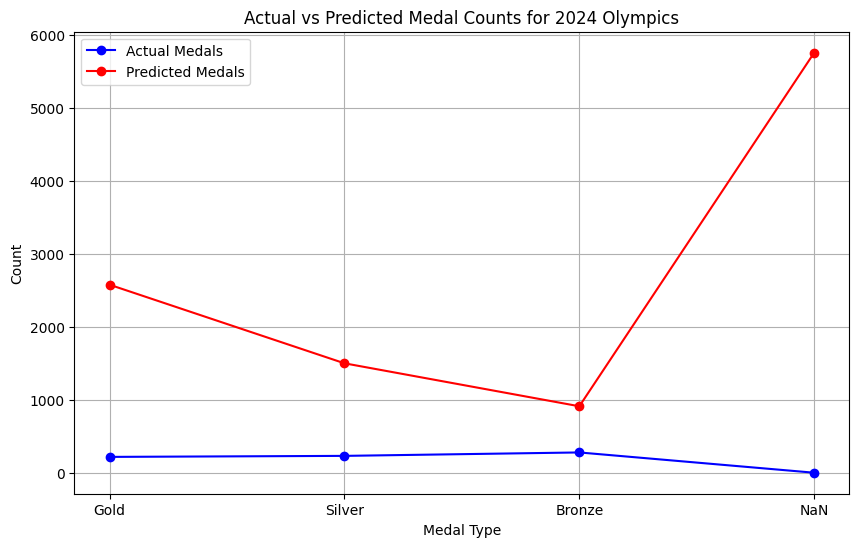

In [ ]:
import matplotlib.pyplot as plt

# Count the number of each type of medal in actual and predicted data
actual_medal_counts = best_lr_data['Medal'].value_counts().reindex(['Gold', 'Silver', 'Bronze', 'NaN'], fill_value=0)
predicted_medal_counts = best_lr_data['Predicted_Medal'].value_counts().reindex(['Gold', 'Silver', 'Bronze', 'NaN'], fill_value=0)

# Create a DataFrame for plotting
medal_comparison = pd.DataFrame({
    'Actual': actual_medal_counts,
    'Predicted': predicted_medal_counts
})

# Plot the line graph
plt.figure(figsize=(10, 6))
plt.plot(medal_comparison.index, medal_comparison['Actual'], marker='o', label='Actual Medals', color='blue')
plt.plot(medal_comparison.index, medal_comparison['Predicted'], marker='o', label='Predicted Medals', color='red')
plt.xlabel('Medal Type')
plt.ylabel('Count')
plt.title('Actual vs Predicted Medal Counts for 2024 Olympics')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
best_lgbm_data = data_2024.copy()

In [ ]:
import pandas as pd
import joblib
import sklearn
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer # Import the SimpleImputer

# Initialize the LabelEncoder
label_encoder = LabelEncoder()
scaler = StandardScaler()

# Fit the label encoder and then transform the data
best_lgbm_data['Sex'] = label_encoder.fit_transform(best_lgbm_data['Sex'])
best_lgbm_data['NOC'] = label_encoder.fit_transform(best_lgbm_data['NOC'])
best_lgbm_data['Season'] = label_encoder.fit_transform(best_lgbm_data['Season'])
best_lgbm_data['City'] = label_encoder.fit_transform(best_lgbm_data['City'])
best_lgbm_data['Event'] = label_encoder.fit_transform(best_lgbm_data['Event'])

#Select only the numeric columns for scaling
numeric_columns = best_lgbm_data.select_dtypes(include=['number']).columns

# Handle missing values using SimpleImputer
imputer = SimpleImputer(strategy='mean') # Initialize SimpleImputer with a strategy
best_lgbm_data[numeric_columns] = imputer.fit_transform(best_lgbm_data[numeric_columns]) # Impute missing values

# Scale the data using only numeric columns
best_lgbm_data_scaled = scaler.fit_transform(best_lgbm_data[numeric_columns])

#Ensure backup2_scaled is a DataFrame with the same numeric columns
best_lgbm_data_scaled = pd.DataFrame(best_lgbm_data_scaled, columns=numeric_columns)

predictions_2024 = best_lgbm.predict(best_lgbm_data_scaled)

# Map the numeric predictions back to medal categories
medal_mapping = {3: 'NaN', 0: 'Bronze', 2: 'Silver', 1: 'Gold'}
predicted_medals = [medal_mapping[pred] for pred in predictions_2024]

# Add the predictions to the original dataframe
best_lgbm_data['Predicted_Medal'] = predicted_medals

# Display the first few rows of the dataframe with predictions
best_lgbm_data.head(50)


,Sex,NOC,Height,Weight,Age,Season,City,Year,Event,Medal,Predicted_Medal
0,1.0,8.0,0.0,0.0,33.0,0.0,0.0,2024.0,675.0,Silver,Silver
1,1.0,8.0,0.0,0.0,25.0,0.0,0.0,2024.0,673.0,Bronze,Silver
2,1.0,8.0,0.0,0.0,28.0,0.0,0.0,2024.0,672.0,NaN,Silver
3,1.0,8.0,0.0,0.0,25.0,0.0,0.0,2024.0,665.0,NaN,Silver
4,1.0,8.0,0.0,0.0,25.0,0.0,0.0,2024.0,666.0,NaN,Silver
5,0.0,43.0,162.0,0.0,31.0,0.0,0.0,2024.0,100.0,NaN,Silver
6,1.0,95.0,0.0,0.0,35.0,0.0,0.0,2024.0,293.0,NaN,Silver
7,0.0,68.0,161.0,0.0,29.0,0.0,0.0,2024.0,88.0,NaN,Bronze
8,1.0,68.0,178.0,0.0,28.0,0.0,0.0,2024.0,40.0,NaN,Gold
9,0.0,122.0,0.0,0.0,30.0,0.0,0.0,2024.0,648.0,NaN,Bronze


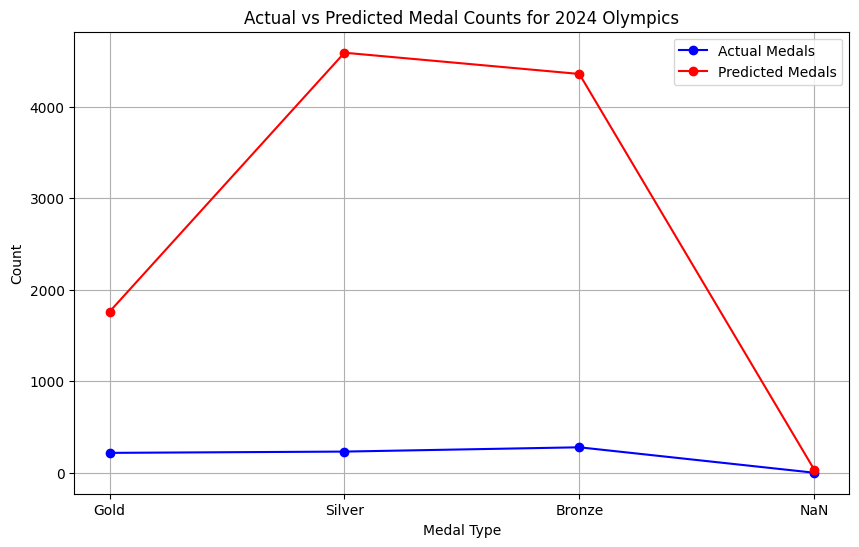

In [ ]:
import matplotlib.pyplot as plt

# Count the number of each type of medal in actual and predicted data
actual_medal_counts = best_lgbm_data['Medal'].value_counts().reindex(['Gold', 'Silver', 'Bronze', 'NaN'], fill_value=0)
predicted_medal_counts = best_lgbm_data['Predicted_Medal'].value_counts().reindex(['Gold', 'Silver', 'Bronze', 'NaN'], fill_value=0)

# Create a DataFrame for plotting
medal_comparison = pd.DataFrame({
    'Actual': actual_medal_counts,
    'Predicted': predicted_medal_counts
})

# Plot the line graph
plt.figure(figsize=(10, 6))
plt.plot(medal_comparison.index, medal_comparison['Actual'], marker='o', label='Actual Medals', color='blue')
plt.plot(medal_comparison.index, medal_comparison['Predicted'], marker='o', label='Predicted Medals', color='red')
plt.xlabel('Medal Type')
plt.ylabel('Count')
plt.title('Actual vs Predicted Medal Counts for 2024 Olympics')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
best_knn_data = data_2024.copy()

In [ ]:
import pandas as pd
import joblib
import sklearn
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer # Import the SimpleImputer

# Initialize the LabelEncoder
label_encoder = LabelEncoder()
scaler = StandardScaler()

# Fit the label encoder and then transform the data
best_knn_data['Sex'] = label_encoder.fit_transform(best_knn_data['Sex'])
best_knn_data['NOC'] = label_encoder.fit_transform(best_knn_data['NOC'])
best_knn_data['Season'] = label_encoder.fit_transform(best_knn_data['Season'])
best_knn_data['City'] = label_encoder.fit_transform(best_knn_data['City'])
best_knn_data['Event'] = label_encoder.fit_transform(best_knn_data['Event'])

#Select only the numeric columns for scaling
numeric_columns = best_knn_data.select_dtypes(include=['number']).columns

# Handle missing values using SimpleImputer
imputer = SimpleImputer(strategy='mean') # Initialize SimpleImputer with a strategy
best_knn_data[numeric_columns] = imputer.fit_transform(best_knn_data[numeric_columns]) # Impute missing values

# Scale the data using only numeric columns
best_knn_data_scaled = scaler.fit_transform(best_knn_data[numeric_columns])

#Ensure backup2_scaled is a DataFrame with the same numeric columns
best_knn_data_scaled = pd.DataFrame(best_knn_data_scaled, columns=numeric_columns)

predictions_2024 = best_knn.predict(best_knn_data_scaled)

# Map the numeric predictions back to medal categories
medal_mapping = {3: 'NaN', 0: 'Bronze', 2: 'Silver', 1: 'Gold'}
predicted_medals = [medal_mapping[pred] for pred in predictions_2024]

# Add the predictions to the original dataframe
best_knn_data['Predicted_Medal'] = predicted_medals

# Display the first few rows of the dataframe with predictions
best_knn_data.head(50)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:458: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  warnings.warn(


,Sex,NOC,Height,Weight,Age,Season,City,Year,Event,Medal,Predicted_Medal
0,1.0,8.0,0.0,0.0,33.0,0.0,0.0,2024.0,675.0,Silver,Silver
1,1.0,8.0,0.0,0.0,25.0,0.0,0.0,2024.0,673.0,Bronze,NaN
2,1.0,8.0,0.0,0.0,28.0,0.0,0.0,2024.0,672.0,NaN,NaN
3,1.0,8.0,0.0,0.0,25.0,0.0,0.0,2024.0,665.0,NaN,NaN
4,1.0,8.0,0.0,0.0,25.0,0.0,0.0,2024.0,666.0,NaN,NaN
5,0.0,43.0,162.0,0.0,31.0,0.0,0.0,2024.0,100.0,NaN,NaN
6,1.0,95.0,0.0,0.0,35.0,0.0,0.0,2024.0,293.0,NaN,Gold
7,0.0,68.0,161.0,0.0,29.0,0.0,0.0,2024.0,88.0,NaN,NaN
8,1.0,68.0,178.0,0.0,28.0,0.0,0.0,2024.0,40.0,NaN,NaN
9,0.0,122.0,0.0,0.0,30.0,0.0,0.0,2024.0,648.0,NaN,Bronze


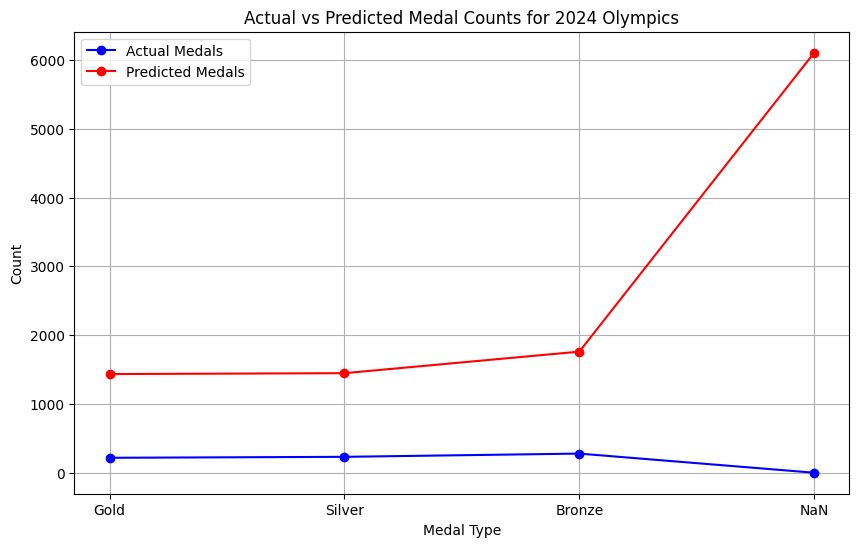

In [ ]:
import matplotlib.pyplot as plt

# Count the number of each type of medal in actual and predicted data
actual_medal_counts = best_knn_data['Medal'].value_counts().reindex(['Gold', 'Silver', 'Bronze', 'NaN'], fill_value=0)
predicted_medal_counts = best_knn_data['Predicted_Medal'].value_counts().reindex(['Gold', 'Silver', 'Bronze', 'NaN'], fill_value=0)

# Create a DataFrame for plotting
medal_comparison = pd.DataFrame({
    'Actual': actual_medal_counts,
    'Predicted': predicted_medal_counts
})

# Plot the line graph
plt.figure(figsize=(10, 6))
plt.plot(medal_comparison.index, medal_comparison['Actual'], marker='o', label='Actual Medals', color='blue')
plt.plot(medal_comparison.index, medal_comparison['Predicted'], marker='o', label='Predicted Medals', color='red')
plt.xlabel('Medal Type')
plt.ylabel('Count')
plt.title('Actual vs Predicted Medal Counts for 2024 Olympics')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
best_nn_data = data_2024.copy()

In [ ]:
import pandas as pd
import joblib
import sklearn
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer # Import the SimpleImputer

# Initialize the LabelEncoder
label_encoder = LabelEncoder()
scaler = StandardScaler()

# Fit the label encoder and then transform the data
best_nn_data['Sex'] = label_encoder.fit_transform(best_nn_data['Sex'])
best_nn_data['NOC'] = label_encoder.fit_transform(best_nn_data['NOC'])
best_nn_data['Season'] = label_encoder.fit_transform(best_nn_data['Season'])
best_nn_data['City'] = label_encoder.fit_transform(best_nn_data['City'])
best_nn_data['Event'] = label_encoder.fit_transform(best_nn_data['Event'])

#Select only the numeric columns for scaling
numeric_columns = best_nn_data.select_dtypes(include=['number']).columns

# Handle missing values using SimpleImputer
imputer = SimpleImputer(strategy='mean') # Initialize SimpleImputer with a strategy
best_nn_data[numeric_columns] = imputer.fit_transform(best_nn_data[numeric_columns]) # Impute missing values

# Scale the data using only numeric columns
best_nn_data_scaled = scaler.fit_transform(best_nn_data[numeric_columns])

#Ensure backup2_scaled is a DataFrame with the same numeric columns
best_nn_data_scaled = pd.DataFrame(best_nn_data_scaled, columns=numeric_columns)

predictions_2024 = best_nn.predict(best_nn_data_scaled)

# Map the numeric predictions back to medal categories
medal_mapping = {3: 'NaN', 0: 'Bronze', 2: 'Silver', 1: 'Gold'}
predicted_medals = [medal_mapping[pred] for pred in predictions_2024]

# Add the predictions to the original dataframe
best_nn_data['Predicted_Medal'] = predicted_medals

# Display the first few rows of the dataframe with predictions
best_nn_data.head(50)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:458: UserWarning: X has feature names, but MLPClassifier was fitted without feature names
  warnings.warn(


,Sex,NOC,Height,Weight,Age,Season,City,Year,Event,Medal,Predicted_Medal
0,1.0,8.0,0.0,0.0,33.0,0.0,0.0,2024.0,675.0,Silver,NaN
1,1.0,8.0,0.0,0.0,25.0,0.0,0.0,2024.0,673.0,Bronze,NaN
2,1.0,8.0,0.0,0.0,28.0,0.0,0.0,2024.0,672.0,NaN,NaN
3,1.0,8.0,0.0,0.0,25.0,0.0,0.0,2024.0,665.0,NaN,NaN
4,1.0,8.0,0.0,0.0,25.0,0.0,0.0,2024.0,666.0,NaN,NaN
5,0.0,43.0,162.0,0.0,31.0,0.0,0.0,2024.0,100.0,NaN,Bronze
6,1.0,95.0,0.0,0.0,35.0,0.0,0.0,2024.0,293.0,NaN,NaN
7,0.0,68.0,161.0,0.0,29.0,0.0,0.0,2024.0,88.0,NaN,NaN
8,1.0,68.0,178.0,0.0,28.0,0.0,0.0,2024.0,40.0,NaN,NaN
9,0.0,122.0,0.0,0.0,30.0,0.0,0.0,2024.0,648.0,NaN,Bronze


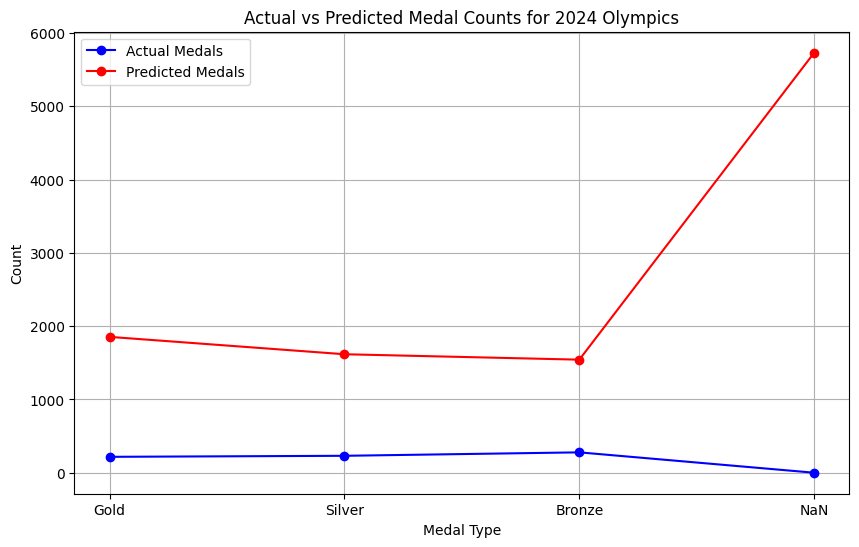

In [ ]:
import matplotlib.pyplot as plt

# Count the number of each type of medal in actual and predicted data
actual_medal_counts = best_nn_data['Medal'].value_counts().reindex(['Gold', 'Silver', 'Bronze', 'NaN'], fill_value=0)
predicted_medal_counts = best_nn_data['Predicted_Medal'].value_counts().reindex(['Gold', 'Silver', 'Bronze', 'NaN'], fill_value=0)

# Create a DataFrame for plotting
medal_comparison = pd.DataFrame({
    'Actual': actual_medal_counts,
    'Predicted': predicted_medal_counts
})

# Plot the line graph
plt.figure(figsize=(10, 6))
plt.plot(medal_comparison.index, medal_comparison['Actual'], marker='o', label='Actual Medals', color='blue')
plt.plot(medal_comparison.index, medal_comparison['Predicted'], marker='o', label='Predicted Medals', color='red')
plt.xlabel('Medal Type')
plt.ylabel('Count')
plt.title('Actual vs Predicted Medal Counts for 2024 Olympics')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
best_ada_data = data_2024.copy()

In [ ]:
import pandas as pd
import joblib
import sklearn
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer # Import the SimpleImputer

# Initialize the LabelEncoder
label_encoder = LabelEncoder()
scaler = StandardScaler()

# Fit the label encoder and then transform the data
best_ada_data['Sex'] = label_encoder.fit_transform(best_ada_data['Sex'])
best_ada_data['NOC'] = label_encoder.fit_transform(best_ada_data['NOC'])
best_ada_data['Season'] = label_encoder.fit_transform(best_ada_data['Season'])
best_ada_data['City'] = label_encoder.fit_transform(best_ada_data['City'])
best_ada_data['Event'] = label_encoder.fit_transform(best_ada_data['Event'])

#Select only the numeric columns for scaling
numeric_columns = best_ada_data.select_dtypes(include=['number']).columns

# Handle missing values using SimpleImputer
imputer = SimpleImputer(strategy='mean') # Initialize SimpleImputer with a strategy
best_ada_data[numeric_columns] = imputer.fit_transform(best_ada_data[numeric_columns]) # Impute missing values

# Scale the data using only numeric columns
best_ada_data_scaled = scaler.fit_transform(best_ada_data[numeric_columns])

#Ensure backup2_scaled is a DataFrame with the same numeric columns
best_ada_data_scaled = pd.DataFrame(best_ada_data_scaled, columns=numeric_columns)

predictions_2024 = best_ada.predict(best_ada_data_scaled)

# Map the numeric predictions back to medal categories
medal_mapping = {3: 'NaN', 0: 'Bronze', 2: 'Silver', 1: 'Gold'}
predicted_medals = [medal_mapping[pred] for pred in predictions_2024]

# Add the predictions to the original dataframe
best_ada_data['Predicted_Medal'] = predicted_medals

# Display the first few rows of the dataframe with predictions
best_ada_data.head(50)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:458: UserWarning: X has feature names, but AdaBoostClassifier was fitted without feature names
  warnings.warn(


,Sex,NOC,Height,Weight,Age,Season,City,Year,Event,Medal,Predicted_Medal
0,1.0,8.0,0.0,0.0,33.0,0.0,0.0,2024.0,675.0,Silver,NaN
1,1.0,8.0,0.0,0.0,25.0,0.0,0.0,2024.0,673.0,Bronze,NaN
2,1.0,8.0,0.0,0.0,28.0,0.0,0.0,2024.0,672.0,NaN,NaN
3,1.0,8.0,0.0,0.0,25.0,0.0,0.0,2024.0,665.0,NaN,NaN
4,1.0,8.0,0.0,0.0,25.0,0.0,0.0,2024.0,666.0,NaN,NaN
5,0.0,43.0,162.0,0.0,31.0,0.0,0.0,2024.0,100.0,NaN,Bronze
6,1.0,95.0,0.0,0.0,35.0,0.0,0.0,2024.0,293.0,NaN,Bronze
7,0.0,68.0,161.0,0.0,29.0,0.0,0.0,2024.0,88.0,NaN,Bronze
8,1.0,68.0,178.0,0.0,28.0,0.0,0.0,2024.0,40.0,NaN,Bronze
9,0.0,122.0,0.0,0.0,30.0,0.0,0.0,2024.0,648.0,NaN,Bronze


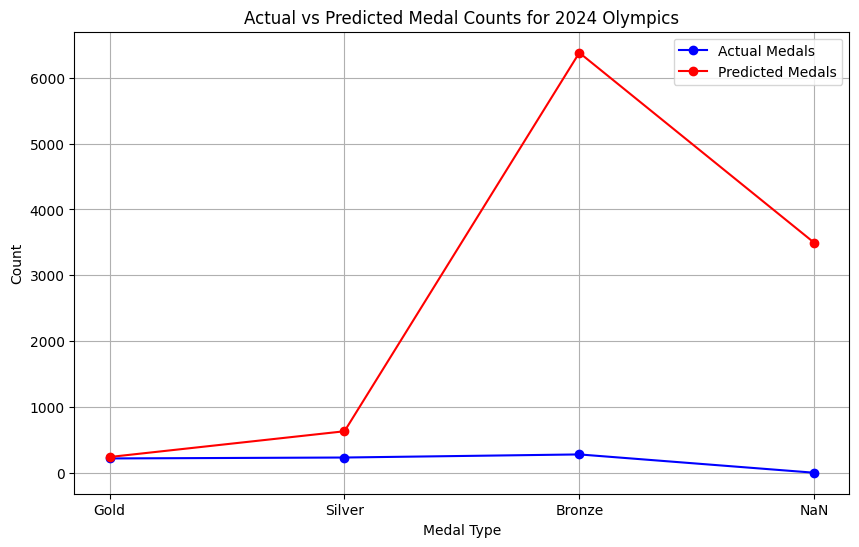

In [ ]:
import matplotlib.pyplot as plt

# Count the number of each type of medal in actual and predicted data
actual_medal_counts = best_ada_data['Medal'].value_counts().reindex(['Gold', 'Silver', 'Bronze', 'NaN'], fill_value=0)
predicted_medal_counts = best_ada_data['Predicted_Medal'].value_counts().reindex(['Gold', 'Silver', 'Bronze', 'NaN'], fill_value=0)

# Create a DataFrame for plotting
medal_comparison = pd.DataFrame({
    'Actual': actual_medal_counts,
    'Predicted': predicted_medal_counts
})

# Plot the line graph
plt.figure(figsize=(10, 6))
plt.plot(medal_comparison.index, medal_comparison['Actual'], marker='o', label='Actual Medals', color='blue')
plt.plot(medal_comparison.index, medal_comparison['Predicted'], marker='o', label='Predicted Medals', color='red')
plt.xlabel('Medal Type')
plt.ylabel('Count')
plt.title('Actual vs Predicted Medal Counts for 2024 Olympics')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
data_2020 = pd.read_csv('/content/drive/MyDrive/ML files/final table for 2020 with event3.csv')

In [ ]:
duplicate_count = data_2020.duplicated().sum()
print(f"Number of duplicate rows: {duplicate_count}")

Number of duplicate rows: 1366


In [ ]:
data_2020 = data_2020.drop_duplicates()

In [ ]:
duplicate_count = data_2020.duplicated().sum()
print(f"Number of duplicate rows: {duplicate_count}")

Number of duplicate rows: 0


In [ ]:
data_2020.head()

,Sex,Age,Height,Weight,NOC,Year,Season,City,Medal,Event
0,F,26,NaN,NaN,NOR,2020,Summer,Tokyo,NaN,Women's Cycling Road
1,M,27,1.65,NaN,ESP,2020,Summer,Tokyo,NaN,Men's Artistic Gymnastics
2,M,25,1.98,NaN,ITA,2020,Summer,Tokyo,NaN,Rowing Men's Lightweight Double Sculls
3,M,25,2.00,NaN,ESP,2020,Summer,Tokyo,NaN,Basketball Men's Basketball
4,F,31,1.92,NaN,ESP,2020,Summer,Tokyo,NaN,Basketball Women's Basketball


In [ ]:
# Identify the columns
cols = list(data_2020.columns)

# Find the index of the Medal column
medal_index = cols.index('Medal')

# Remove the Medal column from its current position
cols.pop(medal_index)

# Add the Medal column to the last position
cols.append('Medal')

# Reorder the DataFrame using the new column order
data_2020 = data_2020[cols]


In [ ]:
data_2020.head()

,Sex,Age,Height,Weight,NOC,Year,Season,City,Event,Medal
0,F,26,NaN,NaN,NOR,2020,Summer,Tokyo,Women's Cycling Road,NaN
1,M,27,1.65,NaN,ESP,2020,Summer,Tokyo,Men's Artistic Gymnastics,NaN
2,M,25,1.98,NaN,ITA,2020,Summer,Tokyo,Rowing Men's Lightweight Double Sculls,NaN
3,M,25,2.00,NaN,ESP,2020,Summer,Tokyo,Basketball Men's Basketball,NaN
4,F,31,1.92,NaN,ESP,2020,Summer,Tokyo,Basketball Women's Basketball,NaN


In [ ]:
data_2020.head()

,Sex,Age,Height,Weight,NOC,Year,Season,City,Event,Medal
0,F,26,NaN,NaN,NOR,2020,Summer,Tokyo,Women's Cycling Road,NaN
1,M,27,1.65,NaN,ESP,2020,Summer,Tokyo,Men's Artistic Gymnastics,NaN
2,M,25,1.98,NaN,ITA,2020,Summer,Tokyo,Rowing Men's Lightweight Double Sculls,NaN
3,M,25,2.00,NaN,ESP,2020,Summer,Tokyo,Basketball Men's Basketball,NaN
4,F,31,1.92,NaN,ESP,2020,Summer,Tokyo,Basketball Women's Basketball,NaN


In [ ]:
best_nb_2020 = data_2020.copy()

In [ ]:
#Change all the values of the Weight column in best_nb_2020 to 0

best_nb_2020['Weight'] = 0


In [ ]:
best_nb_2020.head()

,Sex,Age,Height,Weight,NOC,Year,Season,City,Event,Medal
0,F,26,NaN,0,NOR,2020,Summer,Tokyo,Women's Cycling Road,NaN
1,M,27,1.65,0,ESP,2020,Summer,Tokyo,Men's Artistic Gymnastics,NaN
2,M,25,1.98,0,ITA,2020,Summer,Tokyo,Rowing Men's Lightweight Double Sculls,NaN
3,M,25,2.00,0,ESP,2020,Summer,Tokyo,Basketball Men's Basketball,NaN
4,F,31,1.92,0,ESP,2020,Summer,Tokyo,Basketball Women's Basketball,NaN


In [ ]:
import pandas as pd
import joblib
import sklearn
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer # Import the SimpleImputer

# Initialize the LabelEncoder
label_encoder = LabelEncoder()
scaler = StandardScaler()

# Fit the label encoder and then transform the data
best_nb_2020['Sex'] = label_encoder.fit_transform(best_nb_2020['Sex'])
best_nb_2020['NOC'] = label_encoder.fit_transform(best_nb_2020['NOC'])
best_nb_2020['Season'] = label_encoder.fit_transform(best_nb_2020['Season'])
best_nb_2020['City'] = label_encoder.fit_transform(best_nb_2020['City'])
best_nb_2020['Event'] = label_encoder.fit_transform(best_nb_2020['Event'])

#Select only the numeric columns for scaling
numeric_columns = best_nb_2020.select_dtypes(include=['number']).columns

# Handle missing values using SimpleImputer
imputer = SimpleImputer(strategy='mean') # Initialize SimpleImputer with a strategy
best_nb_2020[numeric_columns] = imputer.fit_transform(best_nb_2020[numeric_columns]) # Impute missing values

# Scale the data using only numeric columns
best_nb_2020_scaled = scaler.fit_transform(best_nb_2020[numeric_columns])

#Ensure best_nb_2020_scaled is a DataFrame with the same numeric columns
best_nb_2020_scaled = pd.DataFrame(best_nb_2020_scaled, columns=numeric_columns)

predictions_2024 = nb.predict(best_nb_2020_scaled)

# Map the numeric predictions back to medal categories
medal_mapping = {3: 'NaN', 0: 'Bronze', 2: 'Silver', 1: 'Gold'}
predicted_medals = [medal_mapping[pred] for pred in predictions_2024]

# Add the predictions to the original dataframe
best_nb_2020['Predicted_Medal'] = predicted_medals

# Display the first few rows of the dataframe with predictions
best_nb_2020.head(50)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:458: UserWarning: X has feature names, but GaussianNB was fitted without feature names
  warnings.warn(


,Sex,Age,Height,Weight,NOC,Year,Season,City,Event,Medal,Predicted_Medal
0,0.0,26.0,1.81177,0.0,140.0,2020.0,0.0,0.0,79.0,NaN,Bronze
1,1.0,27.0,1.65000,0.0,60.0,2020.0,0.0,0.0,27.0,NaN,NaN
2,1.0,25.0,1.98000,0.0,93.0,2020.0,0.0,0.0,46.0,NaN,Bronze
3,1.0,25.0,2.00000,0.0,60.0,2020.0,0.0,0.0,6.0,NaN,NaN
4,0.0,31.0,1.92000,0.0,60.0,2020.0,0.0,0.0,7.0,NaN,NaN
5,1.0,36.0,1.83000,0.0,65.0,2020.0,0.0,0.0,20.0,Gold,NaN
6,1.0,24.0,1.79000,0.0,37.0,2020.0,0.0,0.0,46.0,NaN,NaN
7,1.0,22.0,1.81177,0.0,174.0,2020.0,0.0,0.0,54.0,NaN,Gold
8,1.0,27.0,1.87000,0.0,93.0,2020.0,0.0,0.0,46.0,NaN,Bronze
9,0.0,30.0,1.81177,0.0,87.0,2020.0,0.0,0.0,82.0,NaN,Bronze


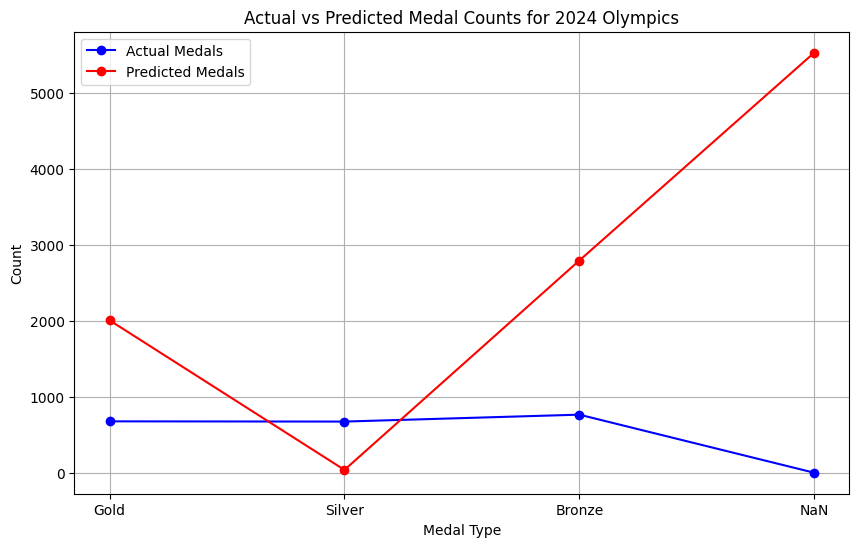

In [ ]:
import matplotlib.pyplot as plt

# Count the number of each type of medal in actual and predicted data
actual_medal_counts = best_nb_2020['Medal'].value_counts().reindex(['Gold', 'Silver', 'Bronze', 'NaN'], fill_value=0)
predicted_medal_counts = best_nb_2020['Predicted_Medal'].value_counts().reindex(['Gold', 'Silver', 'Bronze', 'NaN'], fill_value=0)

# Create a DataFrame for plotting
medal_comparison = pd.DataFrame({
    'Actual': actual_medal_counts,
    'Predicted': predicted_medal_counts
})

# Plot the line graph
plt.figure(figsize=(10, 6))
plt.plot(medal_comparison.index, medal_comparison['Actual'], marker='o', label='Actual Medals', color='blue')
plt.plot(medal_comparison.index, medal_comparison['Predicted'], marker='o', label='Predicted Medals', color='red')
plt.xlabel('Medal Type')
plt.ylabel('Count')
plt.title('Actual vs Predicted Medal Counts for 2024 Olympics')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
data_2020['Weight'] = 0

In [ ]:
data_2020.head()

,Sex,Age,Height,Weight,NOC,Year,Season,City,Event,Medal
0,F,26,NaN,0,NOR,2020,Summer,Tokyo,Women's Cycling Road,NaN
1,M,27,1.65,0,ESP,2020,Summer,Tokyo,Men's Artistic Gymnastics,NaN
2,M,25,1.98,0,ITA,2020,Summer,Tokyo,Rowing Men's Lightweight Double Sculls,NaN
3,M,25,2.00,0,ESP,2020,Summer,Tokyo,Basketball Men's Basketball,NaN
4,F,31,1.92,0,ESP,2020,Summer,Tokyo,Basketball Women's Basketball,NaN


In [ ]:
best_xgb_2020 = data_2020.copy()

In [ ]:
best_xgb_2020.head()

In [ ]:
import pandas as pd
import joblib
import sklearn
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer # Import the SimpleImputer

# Initialize the LabelEncoder
label_encoder = LabelEncoder()
scaler = StandardScaler()

# Fit the label encoder and then transform the data
best_xgb_2020['Sex'] = label_encoder.fit_transform(best_xgb_2020['Sex'])
best_xgb_2020['NOC'] = label_encoder.fit_transform(best_xgb_2020['NOC'])
best_xgb_2020['Season'] = label_encoder.fit_transform(best_xgb_2020['Season'])
best_xgb_2020['City'] = label_encoder.fit_transform(best_xgb_2020['City'])
best_xgb_2020['Event'] = label_encoder.fit_transform(best_xgb_2020['Event'])

#Select only the numeric columns for scaling
numeric_columns = best_xgb_2020.select_dtypes(include=['number']).columns

# Handle missing values using SimpleImputer
imputer = SimpleImputer(strategy='mean') # Initialize SimpleImputer with a strategy
best_xgb_2020[numeric_columns] = imputer.fit_transform(best_xgb_2020[numeric_columns]) # Impute missing values

# Scale the data using only numeric columns
best_xgb_2020_scaled = scaler.fit_transform(best_xgb_2020[numeric_columns])

#Ensure best_xgb_2020_scaled is a DataFrame with the same numeric columns
best_xgb_2020_scaled = pd.DataFrame(best_xgb_2020_scaled, columns=numeric_columns)

predictions_2020 = best_xgb.predict(best_xgb_2020_scaled)

# Map the numeric predictions back to medal categories
medal_mapping = {3: 'NaN', 0: 'Bronze', 2: 'Silver', 1: 'Gold'}
predicted_medals = [medal_mapping[pred] for pred in predictions_2020]

# Add the predictions to the original dataframe
best_xgb_2020['Predicted_Medal'] = predicted_medals

# Display the first few rows of the dataframe with predictions
best_xgb_2020.head(50)

,Sex,Age,Height,Weight,NOC,Year,Season,City,Event,Medal,Predicted_Medal
0,0.0,26.0,1.81177,0.0,140.0,2020.0,0.0,0.0,79.0,NaN,Bronze
1,1.0,27.0,1.65000,0.0,60.0,2020.0,0.0,0.0,27.0,NaN,Silver
2,1.0,25.0,1.98000,0.0,93.0,2020.0,0.0,0.0,46.0,NaN,Gold
3,1.0,25.0,2.00000,0.0,60.0,2020.0,0.0,0.0,6.0,NaN,Silver
4,0.0,31.0,1.92000,0.0,60.0,2020.0,0.0,0.0,7.0,NaN,Bronze
5,1.0,36.0,1.83000,0.0,65.0,2020.0,0.0,0.0,20.0,Gold,Silver
6,1.0,24.0,1.79000,0.0,37.0,2020.0,0.0,0.0,46.0,NaN,Silver
7,1.0,22.0,1.81177,0.0,174.0,2020.0,0.0,0.0,54.0,NaN,Silver
8,1.0,27.0,1.87000,0.0,93.0,2020.0,0.0,0.0,46.0,NaN,Silver
9,0.0,30.0,1.81177,0.0,87.0,2020.0,0.0,0.0,82.0,NaN,Bronze


In [ ]:
import matplotlib.pyplot as plt

# Count the number of each type of medal in actual and predicted data
actual_medal_counts = best_xgb_2020['Medal'].value_counts().reindex(['Gold', 'Silver', 'Bronze', 'NaN'], fill_value=0)
predicted_medal_counts = best_xgb_2020['Predicted_Medal'].value_counts().reindex(['Gold', 'Silver', 'Bronze', 'NaN'], fill_value=0)

# Create a DataFrame for plotting
medal_comparison = pd.DataFrame({
    'Actual': actual_medal_counts,
    'Predicted': predicted_medal_counts
})

# Plot the line graph
plt.figure(figsize=(10, 6))
plt.plot(medal_comparison.index, medal_comparison['Actual'], marker='o', label='Actual Medals', color='blue')
plt.plot(medal_comparison.index, medal_comparison['Predicted'], marker='o', label='Predicted Medals', color='red')
plt.xlabel('Medal Type')
plt.ylabel('Count')
plt.title('Actual vs Predicted Medal Counts for 2024 Olympics')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
best_rf_2020 = data_2020.copy()

In [ ]:
import pandas as pd
import joblib
import sklearn
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer # Import the SimpleImputer

# Initialize the LabelEncoder
label_encoder = LabelEncoder()
scaler = StandardScaler()

# Fit the label encoder and then transform the data
best_rf_2020['Sex'] = label_encoder.fit_transform(best_rf_2020['Sex'])
best_rf_2020['NOC'] = label_encoder.fit_transform(best_rf_2020['NOC'])
best_rf_2020['Season'] = label_encoder.fit_transform(best_rf_2020['Season'])
best_rf_2020['City'] = label_encoder.fit_transform(best_rf_2020['City'])
best_rf_2020['Event'] = label_encoder.fit_transform(best_rf_2020['Event'])

#Select only the numeric columns for scaling
numeric_columns = best_rf_2020.select_dtypes(include=['number']).columns

# Handle missing values using SimpleImputer
imputer = SimpleImputer(strategy='mean') # Initialize SimpleImputer with a strategy
best_rf_2020[numeric_columns] = imputer.fit_transform(best_rf_2020[numeric_columns]) # Impute missing values

# Scale the data using only numeric columns
best_rf_2020_scaled = scaler.fit_transform(best_rf_2020[numeric_columns])

#Ensure best_rf_2020_scaled is a DataFrame with the same numeric columns
best_rf_2020_scaled = pd.DataFrame(best_rf_2020_scaled, columns=numeric_columns)

predictions_2020 = best_rf.predict(best_rf_2020_scaled)

# Map the numeric predictions back to medal categories
medal_mapping = {3: 'NaN', 0: 'Bronze', 2: 'Silver', 1: 'Gold'}
predicted_medals = [medal_mapping[pred] for pred in predictions_2020]

# Add the predictions to the original dataframe
best_rf_2020['Predicted_Medal'] = predicted_medals

# Display the first few rows of the dataframe with predictions
best_rf_2020.head(50)

In [ ]:
import matplotlib.pyplot as plt

# Count the number of each type of medal in actual and predicted data
actual_medal_counts = best_rf_2020['Medal'].value_counts().reindex(['Gold', 'Silver', 'Bronze', 'NaN'], fill_value=0)
predicted_medal_counts = best_rf_2020['Predicted_Medal'].value_counts().reindex(['Gold', 'Silver', 'Bronze', 'NaN'], fill_value=0)

# Create a DataFrame for plotting
medal_comparison = pd.DataFrame({
    'Actual': actual_medal_counts,
    'Predicted': predicted_medal_counts
})

# Plot the line graph
plt.figure(figsize=(10, 6))
plt.plot(medal_comparison.index, medal_comparison['Actual'], marker='o', label='Actual Medals', color='blue')
plt.plot(medal_comparison.index, medal_comparison['Predicted'], marker='o', label='Predicted Medals', color='red')
plt.xlabel('Medal Type')
plt.ylabel('Count')
plt.title('Actual vs Predicted Medal Counts for 2024 Olympics')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
best_lr_2020 = data_2020.copy()

In [ ]:
import pandas as pd
import joblib
import sklearn
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer # Import the SimpleImputer

# Initialize the LabelEncoder
label_encoder = LabelEncoder()
scaler = StandardScaler()

# Fit the label encoder and then transform the data
best_lr_2020['Sex'] = label_encoder.fit_transform(best_lr_2020['Sex'])
best_lr_2020['NOC'] = label_encoder.fit_transform(best_lr_2020['NOC'])
best_lr_2020['Season'] = label_encoder.fit_transform(best_lr_2020['Season'])
best_lr_2020['City'] = label_encoder.fit_transform(best_lr_2020['City'])
best_lr_2020['Event'] = label_encoder.fit_transform(best_lr_2020['Event'])

#Select only the numeric columns for scaling
numeric_columns = best_lr_2020.select_dtypes(include=['number']).columns

# Handle missing values using SimpleImputer
imputer = SimpleImputer(strategy='mean') # Initialize SimpleImputer with a strategy
best_lr_2020[numeric_columns] = imputer.fit_transform(best_lr_2020[numeric_columns]) # Impute missing values

# Scale the data using only numeric columns
best_lr_2020_scaled = scaler.fit_transform(best_lr_2020[numeric_columns])

#Ensure best_lr_2020_scaled is a DataFrame with the same numeric columns
best_lr_2020_scaled = pd.DataFrame(best_lr_2020_scaled, columns=numeric_columns)

predictions_2020 = lr.predict(best_lr_2020_scaled)

# Map the numeric predictions back to medal categories
medal_mapping = {3: 'NaN', 0: 'Bronze', 2: 'Silver', 1: 'Gold'}
predicted_medals = [medal_mapping[pred] for pred in predictions_2020]

# Add the predictions to the original dataframe
best_lr_2020['Predicted_Medal'] = predicted_medals

# Display the first few rows of the dataframe with predictions
best_lr_2020.head(50)

In [ ]:
import matplotlib.pyplot as plt

# Count the number of each type of medal in actual and predicted data
actual_medal_counts = best_lr_2020['Medal'].value_counts().reindex(['Gold', 'Silver', 'Bronze', 'NaN'], fill_value=0)
predicted_medal_counts = best_lr_2020['Predicted_Medal'].value_counts().reindex(['Gold', 'Silver', 'Bronze', 'NaN'], fill_value=0)

# Create a DataFrame for plotting
medal_comparison = pd.DataFrame({
    'Actual': actual_medal_counts,
    'Predicted': predicted_medal_counts
})

# Plot the line graph
plt.figure(figsize=(10, 6))
plt.plot(medal_comparison.index, medal_comparison['Actual'], marker='o', label='Actual Medals', color='blue')
plt.plot(medal_comparison.index, medal_comparison['Predicted'], marker='o', label='Predicted Medals', color='red')
plt.xlabel('Medal Type')
plt.ylabel('Count')
plt.title('Actual vs Predicted Medal Counts for 2020 Olympics')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
best_lgbm_2020 = data_2020.copy()

In [ ]:
import pandas as pd
import joblib
import sklearn
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer # Import the SimpleImputer

# Initialize the LabelEncoder
label_encoder = LabelEncoder()
scaler = StandardScaler()

# Fit the label encoder and then transform the data
best_lgbm_2020['Sex'] = label_encoder.fit_transform(best_lgbm_2020['Sex'])
best_lgbm_2020['NOC'] = label_encoder.fit_transform(best_lgbm_2020['NOC'])
best_lgbm_2020['Season'] = label_encoder.fit_transform(best_lgbm_2020['Season'])
best_lgbm_2020['City'] = label_encoder.fit_transform(best_lgbm_2020['City'])
best_lgbm_2020['Event'] = label_encoder.fit_transform(best_lgbm_2020['Event'])

#Select only the numeric columns for scaling
numeric_columns = best_lgbm_2020.select_dtypes(include=['number']).columns

# Handle missing values using SimpleImputer
imputer = SimpleImputer(strategy='mean') # Initialize SimpleImputer with a strategy
best_lgbm_2020[numeric_columns] = imputer.fit_transform(best_lgbm_2020[numeric_columns]) # Impute missing values

# Scale the data using only numeric columns
best_lgbm_2020_scaled = scaler.fit_transform(best_lgbm_2020[numeric_columns])

# Load the saved models
# model_path = '/content/drive/MyDrive/Final Model/alivemodel.joblib'
# alivemodel = joblib.load(model_path)

# Make predictions using the best model (e.g., Gradient Boosting)
# best_gb = alivemodel['GradientBoosting']

#Ensure best_lgbm_2020_scaled is a DataFrame with the same numeric columns
best_lgbm_2020_scaled = pd.DataFrame(best_lgbm_2020_scaled, columns=numeric_columns)

predictions_2020 = best_lgbm.predict(best_lgbm_2020_scaled)

# Map the numeric predictions back to medal categories
medal_mapping = {3: 'NaN', 0: 'Bronze', 2: 'Silver', 1: 'Gold'}
predicted_medals = [medal_mapping[pred] for pred in predictions_2020]

# Add the predictions to the original dataframe
best_lgbm_2020['Predicted_Medal'] = predicted_medals

# Display the first few rows of the dataframe with predictions
best_lgbm_2020.head(50)

In [ ]:
import matplotlib.pyplot as plt

# Count the number of each type of medal in actual and predicted data
actual_medal_counts = best_lgbm_2020['Medal'].value_counts().reindex(['Gold', 'Silver', 'Bronze', 'NaN'], fill_value=0)
predicted_medal_counts = best_lgbm_2020['Predicted_Medal'].value_counts().reindex(['Gold', 'Silver', 'Bronze', 'NaN'], fill_value=0)

# Create a DataFrame for plotting
medal_comparison = pd.DataFrame({
    'Actual': actual_medal_counts,
    'Predicted': predicted_medal_counts
})

# Plot the line graph
plt.figure(figsize=(10, 6))
plt.plot(medal_comparison.index, medal_comparison['Actual'], marker='o', label='Actual Medals', color='blue')
plt.plot(medal_comparison.index, medal_comparison['Predicted'], marker='o', label='Predicted Medals', color='red')
plt.xlabel('Medal Type')
plt.ylabel('Count')
plt.title('Actual vs Predicted Medal Counts for 2020 Olympics')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
best_knn_2020 = data_2020.copy()

In [ ]:
import pandas as pd
import joblib
import sklearn
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer # Import the SimpleImputer

# Initialize the LabelEncoder
label_encoder = LabelEncoder()
scaler = StandardScaler()

# Fit the label encoder and then transform the data
best_knn_2020['Sex'] = label_encoder.fit_transform(best_knn_2020['Sex'])
best_knn_2020['NOC'] = label_encoder.fit_transform(best_knn_2020['NOC'])
best_knn_2020['Season'] = label_encoder.fit_transform(best_knn_2020['Season'])
best_knn_2020['City'] = label_encoder.fit_transform(best_knn_2020['City'])
best_knn_2020['Event'] = label_encoder.fit_transform(best_knn_2020['Event'])

#Select only the numeric columns for scaling
numeric_columns = best_knn_2020.select_dtypes(include=['number']).columns

# Handle missing values using SimpleImputer
imputer = SimpleImputer(strategy='mean') # Initialize SimpleImputer with a strategy
best_knn_2020[numeric_columns] = imputer.fit_transform(best_knn_2020[numeric_columns]) # Impute missing values

# Scale the data using only numeric columns
best_knn_2020_scaled = scaler.fit_transform(best_knn_2020[numeric_columns])

#Ensure best_knn_2020_scaled is a DataFrame with the same numeric columns
best_knn_2020_scaled = pd.DataFrame(best_knn_2020_scaled, columns=numeric_columns)

predictions_2020 = best_knn.predict(best_knn_2020_scaled)

# Map the numeric predictions back to medal categories
medal_mapping = {3: 'NaN', 0: 'Bronze', 2: 'Silver', 1: 'Gold'}
predicted_medals = [medal_mapping[pred] for pred in predictions_2020]

# Add the predictions to the original dataframe
best_knn_2020['Predicted_Medal'] = predicted_medals

# Display the first few rows of the dataframe with predictions
best_knn_2020.head(50)

In [ ]:
import matplotlib.pyplot as plt

# Count the number of each type of medal in actual and predicted data
actual_medal_counts = best_knn_2020['Medal'].value_counts().reindex(['Gold', 'Silver', 'Bronze', 'NaN'], fill_value=0)
predicted_medal_counts = best_knn_2020['Predicted_Medal'].value_counts().reindex(['Gold', 'Silver', 'Bronze', 'NaN'], fill_value=0)

# Create a DataFrame for plotting
medal_comparison = pd.DataFrame({
    'Actual': actual_medal_counts,
    'Predicted': predicted_medal_counts
})

# Plot the line graph
plt.figure(figsize=(10, 6))
plt.plot(medal_comparison.index, medal_comparison['Actual'], marker='o', label='Actual Medals', color='blue')
plt.plot(medal_comparison.index, medal_comparison['Predicted'], marker='o', label='Predicted Medals', color='red')
plt.xlabel('Medal Type')
plt.ylabel('Count')
plt.title('Actual vs Predicted Medal Counts for 2020 Olympics')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
best_nn_2020 = data_2020.copy()

In [ ]:
import pandas as pd
import joblib
import sklearn
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer # Import the SimpleImputer

# Initialize the LabelEncoder
label_encoder = LabelEncoder()
scaler = StandardScaler()

# Fit the label encoder and then transform the data
best_nn_2020['Sex'] = label_encoder.fit_transform(best_nn_2020['Sex'])
best_nn_2020['NOC'] = label_encoder.fit_transform(best_nn_2020['NOC'])
best_nn_2020['Season'] = label_encoder.fit_transform(best_nn_2020['Season'])
best_nn_2020['City'] = label_encoder.fit_transform(best_nn_2020['City'])
best_nn_2020['Event'] = label_encoder.fit_transform(best_nn_2020['Event'])

#Select only the numeric columns for scaling
numeric_columns = best_nn_2020.select_dtypes(include=['number']).columns

# Handle missing values using SimpleImputer
imputer = SimpleImputer(strategy='mean') # Initialize SimpleImputer with a strategy
best_nn_2020[numeric_columns] = imputer.fit_transform(best_nn_2020[numeric_columns]) # Impute missing values

# Scale the data using only numeric columns
best_nn_2020_scaled = scaler.fit_transform(best_nn_2020[numeric_columns])

#Ensure best_nn_2020_scaled is a DataFrame with the same numeric columns
best_nn_2020_scaled = pd.DataFrame(best_nn_2020_scaled, columns=numeric_columns)

predictions_2020 = best_nn.predict(best_nn_2020_scaled)

# Map the numeric predictions back to medal categories
medal_mapping = {3: 'NaN', 0: 'Bronze', 2: 'Silver', 1: 'Gold'}
predicted_medals = [medal_mapping[pred] for pred in predictions_2020]

# Add the predictions to the original dataframe
best_nn_2020['Predicted_Medal'] = predicted_medals

# Display the first few rows of the dataframe with predictions
best_nn_2020.head(50)

In [ ]:
import matplotlib.pyplot as plt

# Count the number of each type of medal in actual and predicted data
actual_medal_counts = best_nn_2020['Medal'].value_counts().reindex(['Gold', 'Silver', 'Bronze', 'NaN'], fill_value=0)
predicted_medal_counts = best_nn_2020['Predicted_Medal'].value_counts().reindex(['Gold', 'Silver', 'Bronze', 'NaN'], fill_value=0)

# Create a DataFrame for plotting
medal_comparison = pd.DataFrame({
    'Actual': actual_medal_counts,
    'Predicted': predicted_medal_counts
})

# Plot the line graph
plt.figure(figsize=(10, 6))
plt.plot(medal_comparison.index, medal_comparison['Actual'], marker='o', label='Actual Medals', color='blue')
plt.plot(medal_comparison.index, medal_comparison['Predicted'], marker='o', label='Predicted Medals', color='red')
plt.xlabel('Medal Type')
plt.ylabel('Count')
plt.title('Actual vs Predicted Medal Counts for 2020 Olympics')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
best_ada_2020 = data_2020.copy()

In [ ]:
import pandas as pd
import joblib
import sklearn
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer # Import the SimpleImputer

# Initialize the LabelEncoder
label_encoder = LabelEncoder()
scaler = StandardScaler()

# Fit the label encoder and then transform the data
best_ada_2020['Sex'] = label_encoder.fit_transform(best_ada_2020['Sex'])
best_ada_2020['NOC'] = label_encoder.fit_transform(best_ada_2020['NOC'])
best_ada_2020['Season'] = label_encoder.fit_transform(best_ada_2020['Season'])
best_ada_2020['City'] = label_encoder.fit_transform(best_ada_2020['City'])
best_ada_2020['Event'] = label_encoder.fit_transform(best_ada_2020['Event'])

#Select only the numeric columns for scaling
numeric_columns = best_ada_2020.select_dtypes(include=['number']).columns

# Handle missing values using SimpleImputer
imputer = SimpleImputer(strategy='mean') # Initialize SimpleImputer with a strategy
best_ada_2020[numeric_columns] = imputer.fit_transform(best_ada_2020[numeric_columns]) # Impute missing values

# Scale the data using only numeric columns
best_ada_2020_scaled = scaler.fit_transform(best_ada_2020[numeric_columns])

#Ensure best_ada_2020_scaled is a DataFrame with the same numeric columns
best_ada_2020_scaled = pd.DataFrame(best_ada_2020_scaled, columns=numeric_columns)

predictions_2020 = best_ada.predict(best_ada_2020_scaled)

# Map the numeric predictions back to medal categories
medal_mapping = {3: 'NaN', 0: 'Bronze', 2: 'Silver', 1: 'Gold'}
predicted_medals = [medal_mapping[pred] for pred in predictions_2020]

# Add the predictions to the original dataframe
best_ada_2020['Predicted_Medal'] = predicted_medals

# Display the first few rows of the dataframe with predictions
best_ada_2020.head(50)

In [ ]:
import matplotlib.pyplot as plt

# Count the number of each type of medal in actual and predicted data
actual_medal_counts = best_ada_2020 ['Medal'].value_counts().reindex(['Gold', 'Silver', 'Bronze', 'NaN'], fill_value=0)
predicted_medal_counts = best_ada_2020 ['Predicted_Medal'].value_counts().reindex(['Gold', 'Silver', 'Bronze', 'NaN'], fill_value=0)

# Create a DataFrame for plotting
medal_comparison = pd.DataFrame({
    'Actual': actual_medal_counts,
    'Predicted': predicted_medal_counts
})

# Plot the line graph
plt.figure(figsize=(10, 6))
plt.plot(medal_comparison.index, medal_comparison['Actual'], marker='o', label='Actual Medals', color='blue')
plt.plot(medal_comparison.index, medal_comparison['Predicted'], marker='o', label='Predicted Medals', color='red')
plt.xlabel('Medal Type')
plt.ylabel('Count')
plt.title('Actual vs Predicted Medal Counts for 2020 Olympics')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# Group by 'NOC' (country) and count the number of each type of medal in actual and predicted data
actual_medal_counts = best_ada_2020.groupby('NOC')['Medal'].value_counts().unstack().fillna(0)
predicted_medal_counts = best_ada_2020.groupby('NOC')['Predicted_Medal'].value_counts().unstack().fillna(0)

# Ensure both DataFrames have the same columns
medal_types = ['Gold', 'Silver', 'Bronze']
actual_medal_counts = actual_medal_counts.reindex(columns=medal_types, fill_value=0)
predicted_medal_counts = predicted_medal_counts.reindex(columns=medal_types, fill_value=0)

# Create a DataFrame for plotting
medal_comparison = pd.DataFrame({
    'Actual_Gold': actual_medal_counts['Gold'],
    'Predicted_Gold': predicted_medal_counts['Gold'],
    'Actual_Silver': actual_medal_counts['Silver'],
    'Predicted_Silver': predicted_medal_counts['Silver'],
    'Actual_Bronze': actual_medal_counts['Bronze'],
    'Predicted_Bronze': predicted_medal_counts['Bronze']
}).fillna(0)

# Plot the line graph for each medal type
plt.figure(figsize=(14, 8))

# Plot for Gold medals
plt.plot(medal_comparison.index, medal_comparison['Actual_Gold'], marker='o', label='Actual Gold Medals', color='blue')
plt.plot(medal_comparison.index, medal_comparison['Predicted_Gold'], marker='o', label='Predicted Gold Medals', color='red')

# # Plot for Silver medals
plt.plot(medal_comparison.index, medal_comparison['Actual_Silver'], marker='o', label='Actual Silver Medals', color='green')
plt.plot(medal_comparison.index, medal_comparison['Predicted_Silver'], marker='o', label='Predicted Silver Medals', color='orange')

# # Plot for Bronze medals
plt.plot(medal_comparison.index, medal_comparison['Actual_Bronze'], marker='o', label='Actual Bronze Medals', color='purple')
plt.plot(medal_comparison.index, medal_comparison['Predicted_Bronze'], marker='o', label='Predicted Bronze Medals', color='brown')

plt.xlabel('Country (NOC)')
plt.ylabel('Medal Count')
plt.title('Actual vs Predicted Medal Counts for 2024 Olympics by Country')
plt.legend()
plt.xticks(rotation=90)
plt.grid(True)
plt.tight_layout()
plt.show()


In [ ]:
DATA = pd.read_csv('/content/drive/MyDrive/ML files/athlete_events.csv')
region_DATA = pd.read_csv('/content/drive/MyDrive/ML files/noc_regions.csv')

pd.set_option('display.max_rows', None)  # Shows all rows
pd.set_option('display.max_columns', None)  # Shows all columns

In [ ]:
DATA.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN


In [ ]:
DATA.shape


(271116, 15)

In [ ]:
# Merge the dataframes on 'NOC'
DATA = DATA.merge(region_DATA, on='NOC', how='left')

In [ ]:
# Check for missing values
DATA.isnull().sum()

,0
ID,0
Name,0
Sex,0
Age,9474
Height,60171
Weight,62875
Team,0
NOC,0
Games,0
Year,0


In [ ]:
# Check for duplicate rows
DATA.duplicated().sum()

1385

In [ ]:
# Drop duplicate rows
DATA.drop_duplicates(inplace=True)

In [ ]:
DATA.duplicated().sum()

0

In [ ]:
# Display the count of each medal type
DATA['Medal'].value_counts()

,count
Medal,
Gold,13369
Bronze,13295
Silver,13108


In [ ]:
# One-hot encode the 'Medal' column
DATA = pd.concat([DATA, pd.get_dummies(DATA['Medal'])], axis=1)

In [ ]:
DATA.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes,Bronze,Gold,Silver
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN,China,NaN,False,False,False
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN,China,NaN,False,False,False
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN,Denmark,NaN,False,False,False
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold,Denmark,NaN,False,True,False
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN,Netherlands,NaN,False,False,False


In [ ]:
DATA.shape

(269731, 20)

In [ ]:
#Create backup7
backup7 = DATA.copy()
backup7.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes,Bronze,Gold,Silver
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN,China,NaN,False,False,False
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN,China,NaN,False,False,False
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN,Denmark,NaN,False,False,False
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold,Denmark,NaN,False,True,False
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN,Netherlands,NaN,False,False,False


In [ ]:
backup7 = backup7.sort_values(by='Year', ascending=True)
backup7.head(50)

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes,Bronze,Gold,Silver
113465,57486,Pantelis Karasevdas,M,NaN,NaN,NaN,Greece,GRE,1896 Summer,1896,Summer,Athina,Shooting,"Shooting Men's Military Rifle, 200 metres",Gold,Greece,NaN,False,True,False
236410,118532,Momcsill Tapavicza,M,23.0,NaN,NaN,Hungary,HUN,1896 Summer,1896,Summer,Athina,Tennis,Tennis Men's Singles,Bronze,Hungary,NaN,True,False,False
70118,35708,Marie Lon Flameng,M,18.0,NaN,NaN,France,FRA,1896 Summer,1896,Summer,Athina,Cycling,Cycling Men's 100 kilometres,Gold,France,NaN,False,True,False
82893,42102,Miltiadis Gouskos,M,NaN,NaN,NaN,Greece,GRE,1896 Summer,1896,Summer,Athina,Athletics,Athletics Men's Shot Put,Silver,Greece,NaN,False,False,True
82822,42069,Grantley Thomas Smart Goulding,M,22.0,NaN,NaN,Great Britain,GBR,1896 Summer,1896,Summer,Athina,Athletics,Athletics Men's 110 metres Hurdles,Silver,UK,NaN,False,False,True
22953,12068,Arthur Charles Blake,M,24.0,NaN,NaN,United States,USA,1896 Summer,1896,Summer,Athina,Athletics,Athletics Men's Marathon,NaN,USA,NaN,False,False,False
22952,12068,Arthur Charles Blake,M,24.0,NaN,NaN,United States,USA,1896 Summer,1896,Summer,Athina,Athletics,"Athletics Men's 1,500 metres",Silver,USA,NaN,False,False,True
70195,35740,Alfred Flatow,M,26.0,NaN,NaN,Germany,GER,1896 Summer,1896,Summer,Athina,Gymnastics,Gymnastics Men's Horse Vault,NaN,Germany,NaN,False,False,False
182918,91932,"Khios ""Konstantinos"" Paspatis",M,17.0,NaN,NaN,Greece,GRE,1896 Summer,1896,Summer,Athina,Tennis,Tennis Men's Singles,Bronze,Greece,NaN,True,False,False
182919,91932,"Khios ""Konstantinos"" Paspatis",M,17.0,NaN,NaN,Greece-2,GRE,1896 Summer,1896,Summer,Athina,Tennis,Tennis Men's Doubles,NaN,Greece,NaN,False,False,False


In [ ]:
# Create a backup of backup1
backup8 = backup7.copy()

# Print the first few rows of backup2 to verify
backup8.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes,Bronze,Gold,Silver
113465,57486,Pantelis Karasevdas,M,NaN,NaN,NaN,Greece,GRE,1896 Summer,1896,Summer,Athina,Shooting,"Shooting Men's Military Rifle, 200 metres",Gold,Greece,NaN,False,True,False
236410,118532,Momcsill Tapavicza,M,23.0,NaN,NaN,Hungary,HUN,1896 Summer,1896,Summer,Athina,Tennis,Tennis Men's Singles,Bronze,Hungary,NaN,True,False,False
70118,35708,Marie Lon Flameng,M,18.0,NaN,NaN,France,FRA,1896 Summer,1896,Summer,Athina,Cycling,Cycling Men's 100 kilometres,Gold,France,NaN,False,True,False
82893,42102,Miltiadis Gouskos,M,NaN,NaN,NaN,Greece,GRE,1896 Summer,1896,Summer,Athina,Athletics,Athletics Men's Shot Put,Silver,Greece,NaN,False,False,True
82822,42069,Grantley Thomas Smart Goulding,M,22.0,NaN,NaN,Great Britain,GBR,1896 Summer,1896,Summer,Athina,Athletics,Athletics Men's 110 metres Hurdles,Silver,UK,NaN,False,False,True


In [ ]:
# Drop unnecessary columns
backup8 = backup8.drop(['ID', 'Name', 'Team', 'Games', 'Sport', 'region', 'notes', 'Bronze', 'Gold', 'Silver'], axis=1)

In [ ]:
backup8.head()

,Sex,Age,Height,Weight,NOC,Year,Season,City,Event,Medal
113465,M,NaN,NaN,NaN,GRE,1896,Summer,Athina,"Shooting Men's Military Rifle, 200 metres",Gold
236410,M,23.0,NaN,NaN,HUN,1896,Summer,Athina,Tennis Men's Singles,Bronze
70118,M,18.0,NaN,NaN,FRA,1896,Summer,Athina,Cycling Men's 100 kilometres,Gold
82893,M,NaN,NaN,NaN,GRE,1896,Summer,Athina,Athletics Men's Shot Put,Silver
82822,M,22.0,NaN,NaN,GBR,1896,Summer,Athina,Athletics Men's 110 metres Hurdles,Silver


In [ ]:
# Create a backup of backup8
backup9 = backup8.copy()

# Print the first few rows of backup9 to verify
backup9.head(50)

,Sex,Age,Height,Weight,NOC,Year,Season,City,Event,Medal
113465,M,NaN,NaN,NaN,GRE,1896,Summer,Athina,"Shooting Men's Military Rifle, 200 metres",Gold
236410,M,23.0,NaN,NaN,HUN,1896,Summer,Athina,Tennis Men's Singles,Bronze
70118,M,18.0,NaN,NaN,FRA,1896,Summer,Athina,Cycling Men's 100 kilometres,Gold
82893,M,NaN,NaN,NaN,GRE,1896,Summer,Athina,Athletics Men's Shot Put,Silver
82822,M,22.0,NaN,NaN,GBR,1896,Summer,Athina,Athletics Men's 110 metres Hurdles,Silver
22953,M,24.0,NaN,NaN,USA,1896,Summer,Athina,Athletics Men's Marathon,NaN
22952,M,24.0,NaN,NaN,USA,1896,Summer,Athina,"Athletics Men's 1,500 metres",Silver
70195,M,26.0,NaN,NaN,GER,1896,Summer,Athina,Gymnastics Men's Horse Vault,NaN
182918,M,17.0,NaN,NaN,GRE,1896,Summer,Athina,Tennis Men's Singles,Bronze
182919,M,17.0,NaN,NaN,GRE,1896,Summer,Athina,Tennis Men's Doubles,NaN


In [ ]:
DATA_nb = backup9.copy()

In [ ]:
import pandas as pd
import joblib
import sklearn
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer # Import the SimpleImputer

# Initialize the LabelEncoder
label_encoder = LabelEncoder()
scaler = StandardScaler()

# Fit the label encoder and then transform the data
DATA_nb['Sex'] = label_encoder.fit_transform(DATA_nb['Sex'])
DATA_nb['NOC'] = label_encoder.fit_transform(DATA_nb['NOC'])
DATA_nb['Season'] = label_encoder.fit_transform(DATA_nb['Season'])
DATA_nb['City'] = label_encoder.fit_transform(DATA_nb['City'])
DATA_nb['Event'] = label_encoder.fit_transform(DATA_nb['Event'])


#Select only the numeric columns for scaling
numeric_columns = DATA_nb.select_dtypes(include=['number']).columns

# Handle missing values using SimpleImputer
imputer = SimpleImputer(strategy='mean') # Initialize SimpleImputer with a strategy
DATA_nb[numeric_columns] = imputer.fit_transform(DATA_nb[numeric_columns]) # Impute missing values

# Scale the data using only numeric columns
DATA_nb_scaled = scaler.fit_transform(DATA_nb[numeric_columns])

#Ensure DATA_nb_scaled is a DataFrame with the same numeric columns
DATA_nb_scaled = pd.DataFrame(DATA_nb_scaled, columns=numeric_columns)

predictions_2024 = nb.predict(DATA_nb_scaled)

# Map the numeric predictions back to medal categories
medal_mapping = {3: 'NaN', 0: 'Bronze', 2: 'Silver', 1: 'Gold'}
predicted_medals = [medal_mapping[pred] for pred in predictions_2024]

# Add the predictions to the original dataframe
DATA_nb['Predicted_Medal'] = predicted_medals

# Display the first few rows of the dataframe with predictions
DATA_nb.head(50)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:458: UserWarning: X has feature names, but GaussianNB was fitted without feature names
  warnings.warn(


,Sex,Age,Height,Weight,NOC,Year,Season,City,Event,Medal,Predicted_Medal
113465,1.0,25.454776,175.338953,70.701778,81.0,1896.0,0.0,3.0,529.0,Gold,Silver
236410,1.0,23.000000,175.338953,70.701778,90.0,1896.0,0.0,3.0,698.0,Bronze,Silver
70118,1.0,18.000000,175.338953,70.701778,69.0,1896.0,0.0,3.0,258.0,Gold,Silver
82893,1.0,25.454776,175.338953,70.701778,81.0,1896.0,0.0,3.0,119.0,Silver,Silver
82822,1.0,22.000000,175.338953,70.701778,74.0,1896.0,0.0,3.0,77.0,Silver,Silver
22953,1.0,24.000000,175.338953,70.701778,216.0,1896.0,0.0,3.0,115.0,NaN,Gold
22952,1.0,24.000000,175.338953,70.701778,216.0,1896.0,0.0,3.0,70.0,Silver,Gold
70195,1.0,26.000000,175.338953,70.701778,79.0,1896.0,0.0,3.0,367.0,NaN,Silver
182918,1.0,17.000000,175.338953,70.701778,81.0,1896.0,0.0,3.0,698.0,Bronze,Silver
182919,1.0,17.000000,175.338953,70.701778,81.0,1896.0,0.0,3.0,696.0,NaN,Silver


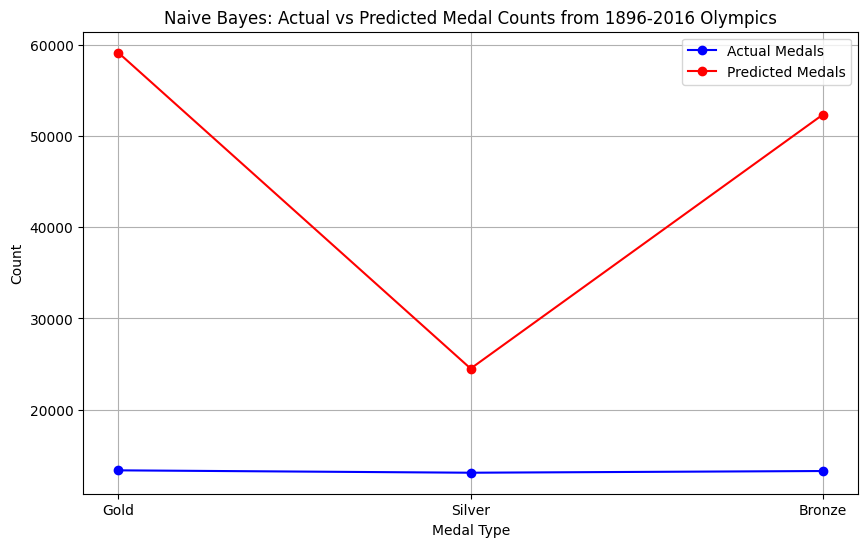

In [ ]:
import matplotlib.pyplot as plt

# Count the number of each type of medal in actual and predicted data
actual_medal_counts = DATA_nb['Medal'].value_counts().reindex(['Gold', 'Silver', 'Bronze'], fill_value=0)
predicted_medal_counts = DATA_nb['Predicted_Medal'].value_counts().reindex(['Gold', 'Silver', 'Bronze'], fill_value=0)

# Create a DataFrame for plotting
medal_comparison = pd.DataFrame({
    'Actual': actual_medal_counts,
    'Predicted': predicted_medal_counts
})

# Plot the line graph
plt.figure(figsize=(10, 6))
plt.plot(medal_comparison.index, medal_comparison['Actual'], marker='o', label='Actual Medals', color='blue')
plt.plot(medal_comparison.index, medal_comparison['Predicted'], marker='o', label='Predicted Medals', color='red')
plt.xlabel('Medal Type')
plt.ylabel('Count')
plt.title('Naive Bayes: Actual vs Predicted Medal Counts from 1896-2016 Olympics')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
DATA_rf = backup9.copy()

In [ ]:
import pandas as pd
import joblib
import sklearn
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer # Import the SimpleImputer

# Initialize the LabelEncoder
label_encoder = LabelEncoder()
scaler = StandardScaler()

# Fit the label encoder and then transform the data
DATA_rf['Sex'] = label_encoder.fit_transform(DATA_rf['Sex'])
DATA_rf['NOC'] = label_encoder.fit_transform(DATA_rf['NOC'])
DATA_rf['Season'] = label_encoder.fit_transform(DATA_rf['Season'])
DATA_rf['City'] = label_encoder.fit_transform(DATA_rf['City'])
DATA_rf['Event'] = label_encoder.fit_transform(DATA_rf['Event'])


#Select only the numeric columns for scaling
numeric_columns = DATA_rf.select_dtypes(include=['number']).columns

# Handle missing values using SimpleImputer
imputer = SimpleImputer(strategy='mean') # Initialize SimpleImputer with a strategy
DATA_rf[numeric_columns] = imputer.fit_transform(DATA_rf[numeric_columns]) # Impute missing values

# Scale the data using only numeric columns
DATA_rf_scaled = scaler.fit_transform(DATA_rf[numeric_columns])

#Ensure DATA_rf_scaled is a DataFrame with the same numeric columns
DATA_rf_scaled = pd.DataFrame(DATA_rf_scaled, columns=numeric_columns)

predictions_2024 = best_rf.predict(DATA_rf_scaled)

# Map the numeric predictions back to medal categories
medal_mapping = {3: 'NaN', 0: 'Bronze', 2: 'Silver', 1: 'Gold'}
predicted_medals = [medal_mapping[pred] for pred in predictions_2024]

# Add the predictions to the original dataframe
DATA_rf['Predicted_Medal'] = predicted_medals

# Display the first few rows of the dataframe with predictions
DATA_rf.head(50)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:458: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


,Sex,Age,Height,Weight,NOC,Year,Season,City,Event,Medal,Predicted_Medal
113465,1.0,25.454776,175.338953,70.701778,81.0,1896.0,0.0,3.0,529.0,Gold,Gold
236410,1.0,23.000000,175.338953,70.701778,90.0,1896.0,0.0,3.0,698.0,Bronze,Gold
70118,1.0,18.000000,175.338953,70.701778,69.0,1896.0,0.0,3.0,258.0,Gold,Silver
82893,1.0,25.454776,175.338953,70.701778,81.0,1896.0,0.0,3.0,119.0,Silver,Silver
82822,1.0,22.000000,175.338953,70.701778,74.0,1896.0,0.0,3.0,77.0,Silver,Bronze
22953,1.0,24.000000,175.338953,70.701778,216.0,1896.0,0.0,3.0,115.0,NaN,Gold
22952,1.0,24.000000,175.338953,70.701778,216.0,1896.0,0.0,3.0,70.0,Silver,Gold
70195,1.0,26.000000,175.338953,70.701778,79.0,1896.0,0.0,3.0,367.0,NaN,NaN
182918,1.0,17.000000,175.338953,70.701778,81.0,1896.0,0.0,3.0,698.0,Bronze,NaN
182919,1.0,17.000000,175.338953,70.701778,81.0,1896.0,0.0,3.0,696.0,NaN,NaN


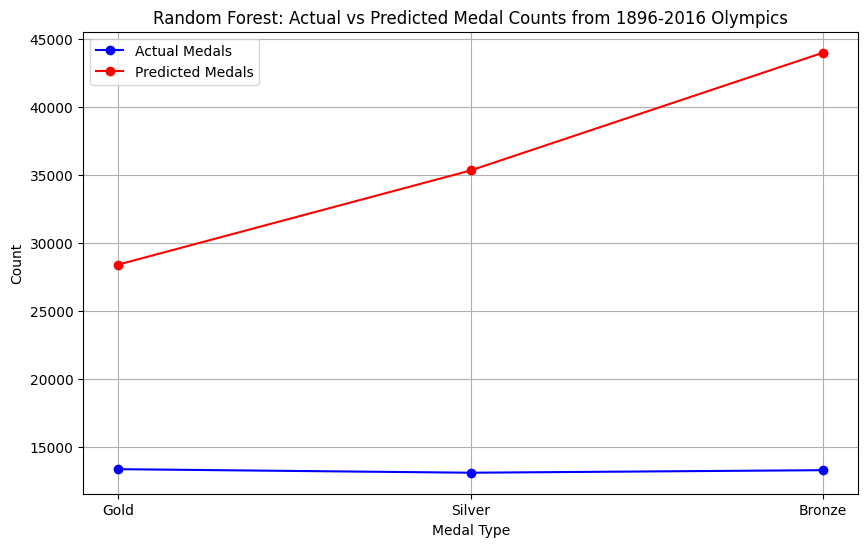

In [ ]:
import matplotlib.pyplot as plt

# Count the number of each type of medal in actual and predicted data
actual_medal_counts = DATA_rf['Medal'].value_counts().reindex(['Gold', 'Silver', 'Bronze'], fill_value=0)
predicted_medal_counts = DATA_rf['Predicted_Medal'].value_counts().reindex(['Gold', 'Silver', 'Bronze'], fill_value=0)

# Create a DataFrame for plotting
medal_comparison = pd.DataFrame({
    'Actual': actual_medal_counts,
    'Predicted': predicted_medal_counts
})

# Plot the line graph
plt.figure(figsize=(10, 6))
plt.plot(medal_comparison.index, medal_comparison['Actual'], marker='o', label='Actual Medals', color='blue')
plt.plot(medal_comparison.index, medal_comparison['Predicted'], marker='o', label='Predicted Medals', color='red')
plt.xlabel('Medal Type')
plt.ylabel('Count')
plt.title('Random Forest: Actual vs Predicted Medal Counts from 1896-2016 Olympics')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
DATA_lgbm = backup9.copy()

In [ ]:
import pandas as pd
import joblib
import sklearn
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer # Import the SimpleImputer

# Initialize the LabelEncoder
label_encoder = LabelEncoder()
scaler = StandardScaler()

# Fit the label encoder and then transform the data
DATA_lgbm['Sex'] = label_encoder.fit_transform(DATA_lgbm['Sex'])
DATA_lgbm['NOC'] = label_encoder.fit_transform(DATA_lgbm['NOC'])
DATA_lgbm['Season'] = label_encoder.fit_transform(DATA_lgbm['Season'])
DATA_lgbm['City'] = label_encoder.fit_transform(DATA_lgbm['City'])
DATA_lgbm['Event'] = label_encoder.fit_transform(DATA_lgbm['Event'])


#Select only the numeric columns for scaling
numeric_columns = DATA_lgbm.select_dtypes(include=['number']).columns

# Handle missing values using SimpleImputer
imputer = SimpleImputer(strategy='mean') # Initialize SimpleImputer with a strategy
DATA_lgbm[numeric_columns] = imputer.fit_transform(DATA_lgbm[numeric_columns]) # Impute missing values

# Scale the data using only numeric columns
DATA_lgbm_scaled = scaler.fit_transform(DATA_lgbm[numeric_columns])

#Ensure DATA_lgbm_scaled is a DataFrame with the same numeric columns
DATA_lgbm_scaled = pd.DataFrame(DATA_lgbm_scaled, columns=numeric_columns)

predictions_2024 = best_lgbm.predict(DATA_lgbm_scaled)

# Map the numeric predictions back to medal categories
medal_mapping = {3: 'NaN', 0: 'Bronze', 2: 'Silver', 1: 'Gold'}
predicted_medals = [medal_mapping[pred] for pred in predictions_2024]

# Add the predictions to the original dataframe
DATA_lgbm['Predicted_Medal'] = predicted_medals

# Display the first few rows of the dataframe with predictions
DATA_lgbm.head(50)

,Sex,Age,Height,Weight,NOC,Year,Season,City,Event,Medal,Predicted_Medal
113465,1.0,25.454776,175.338953,70.701778,81.0,1896.0,0.0,3.0,529.0,Gold,Silver
236410,1.0,23.000000,175.338953,70.701778,90.0,1896.0,0.0,3.0,698.0,Bronze,Gold
70118,1.0,18.000000,175.338953,70.701778,69.0,1896.0,0.0,3.0,258.0,Gold,Bronze
82893,1.0,25.454776,175.338953,70.701778,81.0,1896.0,0.0,3.0,119.0,Silver,Silver
82822,1.0,22.000000,175.338953,70.701778,74.0,1896.0,0.0,3.0,77.0,Silver,Bronze
22953,1.0,24.000000,175.338953,70.701778,216.0,1896.0,0.0,3.0,115.0,NaN,Bronze
22952,1.0,24.000000,175.338953,70.701778,216.0,1896.0,0.0,3.0,70.0,Silver,Gold
70195,1.0,26.000000,175.338953,70.701778,79.0,1896.0,0.0,3.0,367.0,NaN,Silver
182918,1.0,17.000000,175.338953,70.701778,81.0,1896.0,0.0,3.0,698.0,Bronze,Bronze
182919,1.0,17.000000,175.338953,70.701778,81.0,1896.0,0.0,3.0,696.0,NaN,Bronze


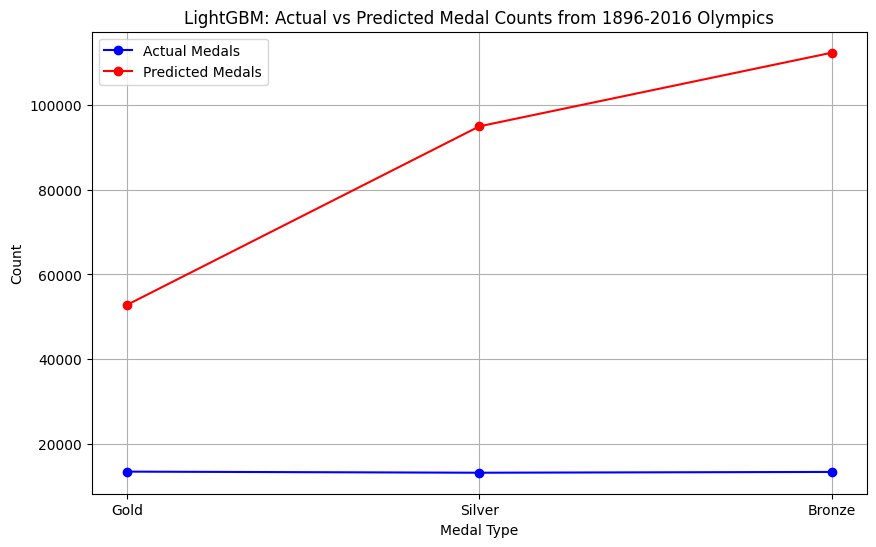

In [ ]:
import matplotlib.pyplot as plt

# Count the number of each type of medal in actual and predicted data
actual_medal_counts = DATA_lgbm['Medal'].value_counts().reindex(['Gold', 'Silver', 'Bronze'], fill_value=0)
predicted_medal_counts = DATA_lgbm['Predicted_Medal'].value_counts().reindex(['Gold', 'Silver', 'Bronze'], fill_value=0)

# Create a DataFrame for plotting
medal_comparison = pd.DataFrame({
    'Actual': actual_medal_counts,
    'Predicted': predicted_medal_counts
})

# Plot the line graph
plt.figure(figsize=(10, 6))
plt.plot(medal_comparison.index, medal_comparison['Actual'], marker='o', label='Actual Medals', color='blue')
plt.plot(medal_comparison.index, medal_comparison['Predicted'], marker='o', label='Predicted Medals', color='red')
plt.xlabel('Medal Type')
plt.ylabel('Count')
plt.title('LightGBM: Actual vs Predicted Medal Counts from 1896-2016 Olympics')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
DATA_gb = backup9.copy()

In [ ]:
DATA_gb.head()

,Sex,Age,Height,Weight,NOC,Year,Season,City,Event,Medal,Predicted_Medal
113465,1.0,25.454776,175.338953,70.701778,81.0,1896.0,0.0,3.0,529.0,Gold,Bronze
236410,1.0,23.000000,175.338953,70.701778,90.0,1896.0,0.0,3.0,698.0,Bronze,Gold
70118,1.0,18.000000,175.338953,70.701778,69.0,1896.0,0.0,3.0,258.0,Gold,Silver
82893,1.0,25.454776,175.338953,70.701778,81.0,1896.0,0.0,3.0,119.0,Silver,Silver
82822,1.0,22.000000,175.338953,70.701778,74.0,1896.0,0.0,3.0,77.0,Silver,Bronze


In [ ]:
import pandas as pd
import joblib
import sklearn
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer # Import the SimpleImputer

# Initialize the LabelEncoder
label_encoder = LabelEncoder()
scaler = StandardScaler()

# Fit the label encoder and then transform the data
DATA_gb['Sex'] = label_encoder.fit_transform(DATA_gb['Sex'])
DATA_gb['NOC'] = label_encoder.fit_transform(DATA_gb['NOC'])
DATA_gb['Season'] = label_encoder.fit_transform(DATA_gb['Season'])
DATA_gb['City'] = label_encoder.fit_transform(DATA_gb['City'])
DATA_gb['Event'] = label_encoder.fit_transform(DATA_gb['Event'])


#Select only the numeric columns for scaling
numeric_columns = DATA_gb.select_dtypes(include=['number']).columns

# Handle missing values using SimpleImputer
imputer = SimpleImputer(strategy='mean') # Initialize SimpleImputer with a strategy
DATA_gb[numeric_columns] = imputer.fit_transform(DATA_gb[numeric_columns]) # Impute missing values

# Scale the data using only numeric columns
DATA_gb_scaled = scaler.fit_transform(DATA_gb[numeric_columns])

#Ensure DATA_gb_scaled is a DataFrame with the same numeric columns
DATA_gb_scaled = pd.DataFrame(DATA_gb_scaled, columns=numeric_columns)

predictions_2024 = best_gb.predict(DATA_gb_scaled)

# Map the numeric predictions back to medal categories
medal_mapping = {3: 'NaN', 0: 'Bronze', 2: 'Silver', 1: 'Gold'}
predicted_medals = [medal_mapping[pred] for pred in predictions_2024]

# Add the predictions to the original dataframe
DATA_gb['Predicted_Medal'] = predicted_medals

# Display the first few rows of the dataframe with predictions
DATA_gb.head(50)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:458: UserWarning: X has feature names, but GradientBoostingClassifier was fitted without feature names
  warnings.warn(


,Sex,Age,Height,Weight,NOC,Year,Season,City,Event,Medal,Predicted_Medal
113465,1.0,25.454776,175.338953,70.701778,81.0,1896.0,0.0,3.0,529.0,Gold,Bronze
236410,1.0,23.000000,175.338953,70.701778,90.0,1896.0,0.0,3.0,698.0,Bronze,Gold
70118,1.0,18.000000,175.338953,70.701778,69.0,1896.0,0.0,3.0,258.0,Gold,Silver
82893,1.0,25.454776,175.338953,70.701778,81.0,1896.0,0.0,3.0,119.0,Silver,Silver
82822,1.0,22.000000,175.338953,70.701778,74.0,1896.0,0.0,3.0,77.0,Silver,Bronze
22953,1.0,24.000000,175.338953,70.701778,216.0,1896.0,0.0,3.0,115.0,NaN,Bronze
22952,1.0,24.000000,175.338953,70.701778,216.0,1896.0,0.0,3.0,70.0,Silver,Gold
70195,1.0,26.000000,175.338953,70.701778,79.0,1896.0,0.0,3.0,367.0,NaN,Gold
182918,1.0,17.000000,175.338953,70.701778,81.0,1896.0,0.0,3.0,698.0,Bronze,Silver
182919,1.0,17.000000,175.338953,70.701778,81.0,1896.0,0.0,3.0,696.0,NaN,Silver


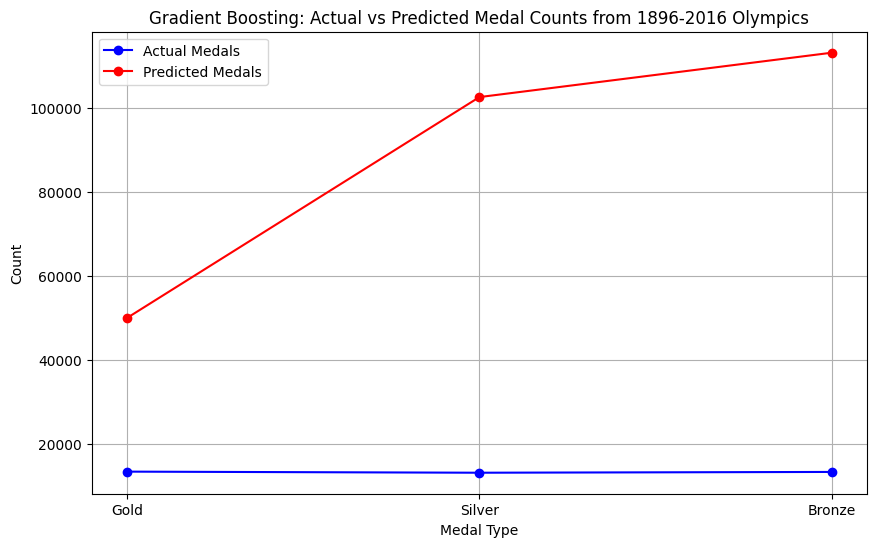

In [ ]:
import matplotlib.pyplot as plt

# Count the number of each type of medal in actual and predicted data
actual_medal_counts = DATA_gb['Medal'].value_counts().reindex(['Gold', 'Silver', 'Bronze'], fill_value=0)
predicted_medal_counts = DATA_gb['Predicted_Medal'].value_counts().reindex(['Gold', 'Silver', 'Bronze'], fill_value=0)

# Create a DataFrame for plotting
medal_comparison = pd.DataFrame({
    'Actual': actual_medal_counts,
    'Predicted': predicted_medal_counts
})

# Plot the line graph
plt.figure(figsize=(10, 6))
plt.plot(medal_comparison.index, medal_comparison['Actual'], marker='o', label='Actual Medals', color='blue')
plt.plot(medal_comparison.index, medal_comparison['Predicted'], marker='o', label='Predicted Medals', color='red')
plt.xlabel('Medal Type')
plt.ylabel('Count')
plt.title('Gradient Boosting: Actual vs Predicted Medal Counts from 1896-2016 Olympics')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
DATA_xgb = backup9.copy()

In [ ]:
DATA_xgb.head()

,Sex,Age,Height,Weight,NOC,Year,Season,City,Event,Medal
113465,M,NaN,NaN,NaN,GRE,1896,Summer,Athina,"Shooting Men's Military Rifle, 200 metres",Gold
236410,M,23.0,NaN,NaN,HUN,1896,Summer,Athina,Tennis Men's Singles,Bronze
70118,M,18.0,NaN,NaN,FRA,1896,Summer,Athina,Cycling Men's 100 kilometres,Gold
82893,M,NaN,NaN,NaN,GRE,1896,Summer,Athina,Athletics Men's Shot Put,Silver
82822,M,22.0,NaN,NaN,GBR,1896,Summer,Athina,Athletics Men's 110 metres Hurdles,Silver


In [ ]:
import pandas as pd
import joblib
import sklearn
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer # Import the SimpleImputer

# Initialize the LabelEncoder
label_encoder = LabelEncoder()
scaler = StandardScaler()

# Fit the label encoder and then transform the data
DATA_xgb['Sex'] = label_encoder.fit_transform(DATA_xgb['Sex'])
DATA_xgb['NOC'] = label_encoder.fit_transform(DATA_xgb['NOC'])
DATA_xgb['Season'] = label_encoder.fit_transform(DATA_xgb['Season'])
DATA_xgb['City'] = label_encoder.fit_transform(DATA_xgb['City'])
DATA_xgb['Event'] = label_encoder.fit_transform(DATA_xgb['Event'])


#Select only the numeric columns for scaling
numeric_columns = DATA_xgb.select_dtypes(include=['number']).columns

# Handle missing values using SimpleImputer
imputer = SimpleImputer(strategy='mean') # Initialize SimpleImputer with a strategy
DATA_xgb[numeric_columns] = imputer.fit_transform(DATA_xgb[numeric_columns]) # Impute missing values

# Scale the data using only numeric columns
DATA_xgb_scaled = scaler.fit_transform(DATA_xgb[numeric_columns])

#Ensure DATA_xgb_scaled is a DataFrame with the same numeric columns
DATA_xgb_scaled = pd.DataFrame(DATA_xgb_scaled, columns=numeric_columns)

predictions_2024 = best_xgb.predict(DATA_xgb_scaled)

# Map the numeric predictions back to medal categories
medal_mapping = {3: 'NaN', 0: 'Bronze', 2: 'Silver', 1: 'Gold'}
predicted_medals = [medal_mapping[pred] for pred in predictions_2024]

# Add the predictions to the original dataframe
DATA_xgb['Predicted_Medal'] = predicted_medals

# Display the first few rows of the dataframe with predictions
DATA_xgb.head(50)

,Sex,Age,Height,Weight,NOC,Year,Season,City,Event,Medal,Predicted_Medal
113465,1.0,25.454776,175.338953,70.701778,81.0,1896.0,0.0,3.0,529.0,Gold,Silver
236410,1.0,23.000000,175.338953,70.701778,90.0,1896.0,0.0,3.0,698.0,Bronze,Gold
70118,1.0,18.000000,175.338953,70.701778,69.0,1896.0,0.0,3.0,258.0,Gold,Gold
82893,1.0,25.454776,175.338953,70.701778,81.0,1896.0,0.0,3.0,119.0,Silver,Silver
82822,1.0,22.000000,175.338953,70.701778,74.0,1896.0,0.0,3.0,77.0,Silver,Bronze
22953,1.0,24.000000,175.338953,70.701778,216.0,1896.0,0.0,3.0,115.0,NaN,Gold
22952,1.0,24.000000,175.338953,70.701778,216.0,1896.0,0.0,3.0,70.0,Silver,Gold
70195,1.0,26.000000,175.338953,70.701778,79.0,1896.0,0.0,3.0,367.0,NaN,Gold
182918,1.0,17.000000,175.338953,70.701778,81.0,1896.0,0.0,3.0,698.0,Bronze,Gold
182919,1.0,17.000000,175.338953,70.701778,81.0,1896.0,0.0,3.0,696.0,NaN,Gold


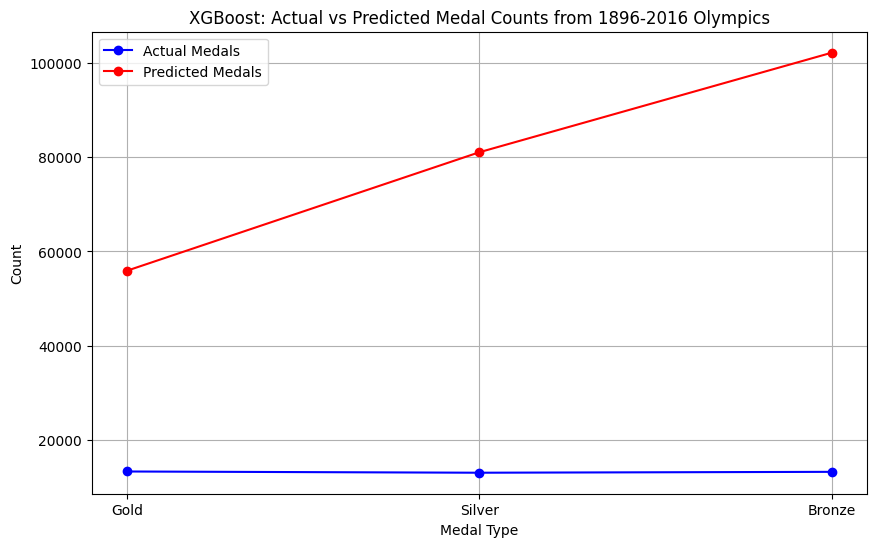

In [ ]:
import matplotlib.pyplot as plt

# Count the number of each type of medal in actual and predicted data
actual_medal_counts = DATA_xgb['Medal'].value_counts().reindex(['Gold', 'Silver', 'Bronze'], fill_value=0)
predicted_medal_counts = DATA_xgb['Predicted_Medal'].value_counts().reindex(['Gold', 'Silver', 'Bronze'], fill_value=0)

# Create a DataFrame for plotting
medal_comparison = pd.DataFrame({
    'Actual': actual_medal_counts,
    'Predicted': predicted_medal_counts
})

# Plot the line graph
plt.figure(figsize=(10, 6))
plt.plot(medal_comparison.index, medal_comparison['Actual'], marker='o', label='Actual Medals', color='blue')
plt.plot(medal_comparison.index, medal_comparison['Predicted'], marker='o', label='Predicted Medals', color='red')
plt.xlabel('Medal Type')
plt.ylabel('Count')
plt.title('XGBoost: Actual vs Predicted Medal Counts from 1896-2016 Olympics')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
DATA_lr = backup9.copy()

In [ ]:
import pandas as pd
import joblib
import sklearn
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer # Import the SimpleImputer

# Initialize the LabelEncoder
label_encoder = LabelEncoder()
scaler = StandardScaler()

# Fit the label encoder and then transform the data
DATA_lr['Sex'] = label_encoder.fit_transform(DATA_lr['Sex'])
DATA_lr['NOC'] = label_encoder.fit_transform(DATA_lr['NOC'])
DATA_lr['Season'] = label_encoder.fit_transform(DATA_lr['Season'])
DATA_lr['City'] = label_encoder.fit_transform(DATA_lr['City'])
DATA_lr['Event'] = label_encoder.fit_transform(DATA_lr['Event'])


#Select only the numeric columns for scaling
numeric_columns = DATA_lr.select_dtypes(include=['number']).columns

# Handle missing values using SimpleImputer
imputer = SimpleImputer(strategy='mean') # Initialize SimpleImputer with a strategy
DATA_lr[numeric_columns] = imputer.fit_transform(DATA_lr[numeric_columns]) # Impute missing values

# Scale the data using only numeric columns
DATA_lr_scaled = scaler.fit_transform(DATA_lr[numeric_columns])

#Ensure DATA_lr_scaled is a DataFrame with the same numeric columns
DATA_lr_scaled = pd.DataFrame(DATA_lr_scaled, columns=numeric_columns)

predictions_2024 = lr.predict(DATA_lr_scaled)

# Map the numeric predictions back to medal categories
medal_mapping = {3: 'NaN', 0: 'Bronze', 2: 'Silver', 1: 'Gold'}
predicted_medals = [medal_mapping[pred] for pred in predictions_2024]

# Add the predictions to the original dataframe
DATA_lr['Predicted_Medal'] = predicted_medals

# Display the first few rows of the dataframe with predictions
DATA_lr.head(50)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:458: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


,Sex,Age,Height,Weight,NOC,Year,Season,City,Event,Medal,Predicted_Medal
113465,1.0,25.454776,175.338953,70.701778,81.0,1896.0,0.0,3.0,529.0,Gold,Silver
236410,1.0,23.000000,175.338953,70.701778,90.0,1896.0,0.0,3.0,698.0,Bronze,Silver
70118,1.0,18.000000,175.338953,70.701778,69.0,1896.0,0.0,3.0,258.0,Gold,Silver
82893,1.0,25.454776,175.338953,70.701778,81.0,1896.0,0.0,3.0,119.0,Silver,Silver
82822,1.0,22.000000,175.338953,70.701778,74.0,1896.0,0.0,3.0,77.0,Silver,Silver
22953,1.0,24.000000,175.338953,70.701778,216.0,1896.0,0.0,3.0,115.0,NaN,Gold
22952,1.0,24.000000,175.338953,70.701778,216.0,1896.0,0.0,3.0,70.0,Silver,Gold
70195,1.0,26.000000,175.338953,70.701778,79.0,1896.0,0.0,3.0,367.0,NaN,Silver
182918,1.0,17.000000,175.338953,70.701778,81.0,1896.0,0.0,3.0,698.0,Bronze,Silver
182919,1.0,17.000000,175.338953,70.701778,81.0,1896.0,0.0,3.0,696.0,NaN,Silver


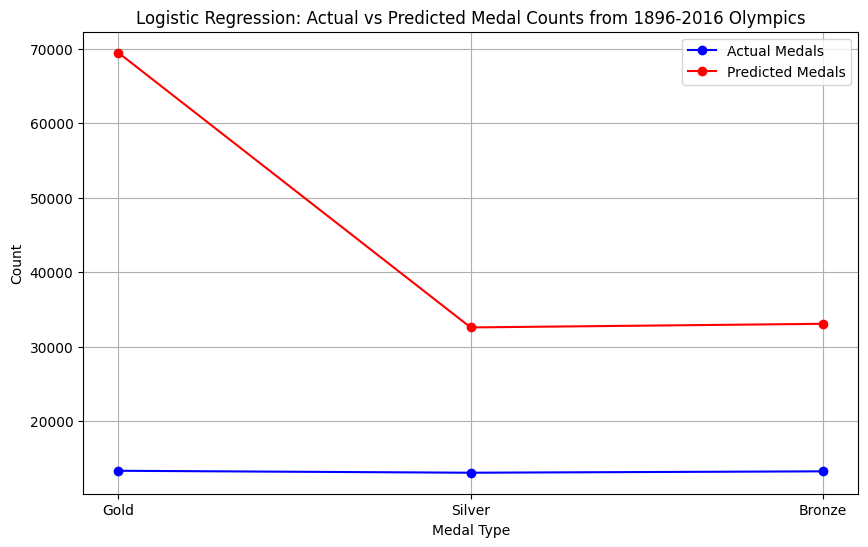

In [ ]:
import matplotlib.pyplot as plt

# Count the number of each type of medal in actual and predicted data
actual_medal_counts = DATA_lr['Medal'].value_counts().reindex(['Gold', 'Silver', 'Bronze'], fill_value=0)
predicted_medal_counts = DATA_lr['Predicted_Medal'].value_counts().reindex(['Gold', 'Silver', 'Bronze'], fill_value=0)

# Create a DataFrame for plotting
medal_comparison = pd.DataFrame({
    'Actual': actual_medal_counts,
    'Predicted': predicted_medal_counts
})

# Plot the line graph
plt.figure(figsize=(10, 6))
plt.plot(medal_comparison.index, medal_comparison['Actual'], marker='o', label='Actual Medals', color='blue')
plt.plot(medal_comparison.index, medal_comparison['Predicted'], marker='o', label='Predicted Medals', color='red')
plt.xlabel('Medal Type')
plt.ylabel('Count')
plt.title('Logistic Regression: Actual vs Predicted Medal Counts from 1896-2016 Olympics')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
DATA_knn = backup9.copy()

In [ ]:
import pandas as pd
import joblib
import sklearn
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer # Import the SimpleImputer

# Initialize the LabelEncoder
label_encoder = LabelEncoder()
scaler = StandardScaler()

# Fit the label encoder and then transform the data
DATA_knn['Sex'] = label_encoder.fit_transform(DATA_knn['Sex'])
DATA_knn['NOC'] = label_encoder.fit_transform(DATA_knn['NOC'])
DATA_knn['Season'] = label_encoder.fit_transform(DATA_knn['Season'])
DATA_knn['City'] = label_encoder.fit_transform(DATA_knn['City'])
DATA_knn['Event'] = label_encoder.fit_transform(DATA_knn['Event'])


#Select only the numeric columns for scaling
numeric_columns = DATA_knn.select_dtypes(include=['number']).columns

# Handle missing values using SimpleImputer
imputer = SimpleImputer(strategy='mean') # Initialize SimpleImputer with a strategy
DATA_knn[numeric_columns] = imputer.fit_transform(DATA_knn[numeric_columns]) # Impute missing values

# Scale the data using only numeric columns
DATA_knn_scaled = scaler.fit_transform(DATA_knn[numeric_columns])

#Ensure DATA_knn_scaled is a DataFrame with the same numeric columns
DATA_knn_scaled = pd.DataFrame(DATA_knn_scaled, columns=numeric_columns)

predictions_2024 = best_knn.predict(DATA_knn_scaled)

# Map the numeric predictions back to medal categories
medal_mapping = {3: 'NaN', 0: 'Bronze', 2: 'Silver', 1: 'Gold'}
predicted_medals = [medal_mapping[pred] for pred in predictions_2024]

# Add the predictions to the original dataframe
DATA_knn['Predicted_Medal'] = predicted_medals

# Display the first few rows of the dataframe with predictions
DATA_knn.head(50)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:458: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  warnings.warn(


,Sex,Age,Height,Weight,NOC,Year,Season,City,Event,Medal,Predicted_Medal
113465,1.0,25.454776,175.338953,70.701778,81.0,1896.0,0.0,3.0,529.0,Gold,Silver
236410,1.0,23.000000,175.338953,70.701778,90.0,1896.0,0.0,3.0,698.0,Bronze,Gold
70118,1.0,18.000000,175.338953,70.701778,69.0,1896.0,0.0,3.0,258.0,Gold,Bronze
82893,1.0,25.454776,175.338953,70.701778,81.0,1896.0,0.0,3.0,119.0,Silver,NaN
82822,1.0,22.000000,175.338953,70.701778,74.0,1896.0,0.0,3.0,77.0,Silver,Bronze
22953,1.0,24.000000,175.338953,70.701778,216.0,1896.0,0.0,3.0,115.0,NaN,Gold
22952,1.0,24.000000,175.338953,70.701778,216.0,1896.0,0.0,3.0,70.0,Silver,Gold
70195,1.0,26.000000,175.338953,70.701778,79.0,1896.0,0.0,3.0,367.0,NaN,Silver
182918,1.0,17.000000,175.338953,70.701778,81.0,1896.0,0.0,3.0,698.0,Bronze,Gold
182919,1.0,17.000000,175.338953,70.701778,81.0,1896.0,0.0,3.0,696.0,NaN,Gold


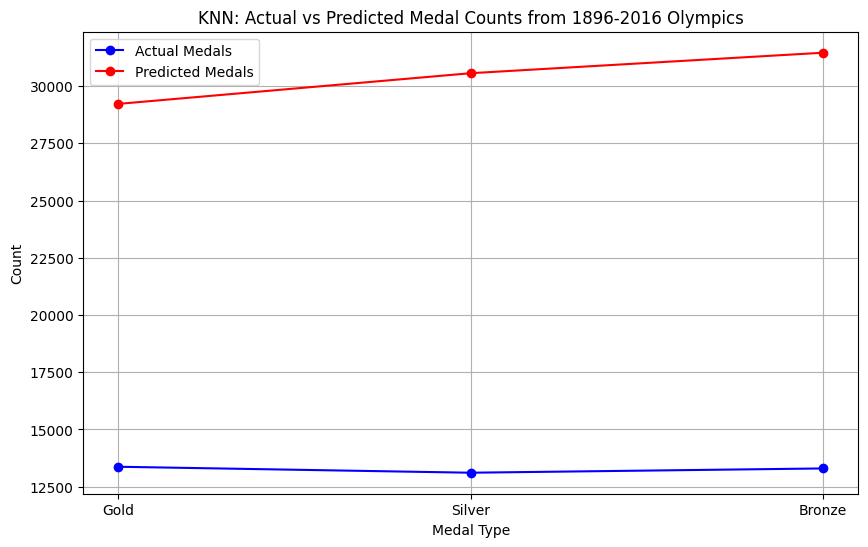

In [ ]:
import matplotlib.pyplot as plt

# Count the number of each type of medal in actual and predicted data
actual_medal_counts = DATA_knn['Medal'].value_counts().reindex(['Gold', 'Silver', 'Bronze'], fill_value=0)
predicted_medal_counts = DATA_knn['Predicted_Medal'].value_counts().reindex(['Gold', 'Silver', 'Bronze'], fill_value=0)

# Create a DataFrame for plotting
medal_comparison = pd.DataFrame({
    'Actual': actual_medal_counts,
    'Predicted': predicted_medal_counts
})

# Plot the line graph
plt.figure(figsize=(10, 6))
plt.plot(medal_comparison.index, medal_comparison['Actual'], marker='o', label='Actual Medals', color='blue')
plt.plot(medal_comparison.index, medal_comparison['Predicted'], marker='o', label='Predicted Medals', color='red')
plt.xlabel('Medal Type')
plt.ylabel('Count')
plt.title('KNN: Actual vs Predicted Medal Counts from 1896-2016 Olympics')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
DATA_nn = backup9.copy()

In [ ]:
import pandas as pd
import joblib
import sklearn
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer # Import the SimpleImputer

# Initialize the LabelEncoder
label_encoder = LabelEncoder()
scaler = StandardScaler()

# Fit the label encoder and then transform the data
DATA_nn['Sex'] = label_encoder.fit_transform(DATA_nn['Sex'])
DATA_nn['NOC'] = label_encoder.fit_transform(DATA_nn['NOC'])
DATA_nn['Season'] = label_encoder.fit_transform(DATA_nn['Season'])
DATA_nn['City'] = label_encoder.fit_transform(DATA_nn['City'])
DATA_nn['Event'] = label_encoder.fit_transform(DATA_nn['Event'])


#Select only the numeric columns for scaling
numeric_columns = DATA_nn.select_dtypes(include=['number']).columns

# Handle missing values using SimpleImputer
imputer = SimpleImputer(strategy='mean') # Initialize SimpleImputer with a strategy
DATA_nn[numeric_columns] = imputer.fit_transform(DATA_nn[numeric_columns]) # Impute missing values

# Scale the data using only numeric columns
DATA_nn_scaled = scaler.fit_transform(DATA_nn[numeric_columns])

#Ensure DATA_nn_scaled is a DataFrame with the same numeric columns
DATA_nn_scaled = pd.DataFrame(DATA_nn_scaled, columns=numeric_columns)

predictions_2024 = best_nn.predict(DATA_nn_scaled)

# Map the numeric predictions back to medal categories
medal_mapping = {3: 'NaN', 0: 'Bronze', 2: 'Silver', 1: 'Gold'}
predicted_medals = [medal_mapping[pred] for pred in predictions_2024]

# Add the predictions to the original dataframe
DATA_nn['Predicted_Medal'] = predicted_medals

# Display the first few rows of the dataframe with predictions
DATA_nn.head(50)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:458: UserWarning: X has feature names, but MLPClassifier was fitted without feature names
  warnings.warn(


,Sex,Age,Height,Weight,NOC,Year,Season,City,Event,Medal,Predicted_Medal
113465,1.0,25.454776,175.338953,70.701778,81.0,1896.0,0.0,3.0,529.0,Gold,Gold
236410,1.0,23.000000,175.338953,70.701778,90.0,1896.0,0.0,3.0,698.0,Bronze,Gold
70118,1.0,18.000000,175.338953,70.701778,69.0,1896.0,0.0,3.0,258.0,Gold,Gold
82893,1.0,25.454776,175.338953,70.701778,81.0,1896.0,0.0,3.0,119.0,Silver,Silver
82822,1.0,22.000000,175.338953,70.701778,74.0,1896.0,0.0,3.0,77.0,Silver,Bronze
22953,1.0,24.000000,175.338953,70.701778,216.0,1896.0,0.0,3.0,115.0,NaN,Gold
22952,1.0,24.000000,175.338953,70.701778,216.0,1896.0,0.0,3.0,70.0,Silver,Gold
70195,1.0,26.000000,175.338953,70.701778,79.0,1896.0,0.0,3.0,367.0,NaN,Silver
182918,1.0,17.000000,175.338953,70.701778,81.0,1896.0,0.0,3.0,698.0,Bronze,Gold
182919,1.0,17.000000,175.338953,70.701778,81.0,1896.0,0.0,3.0,696.0,NaN,Gold


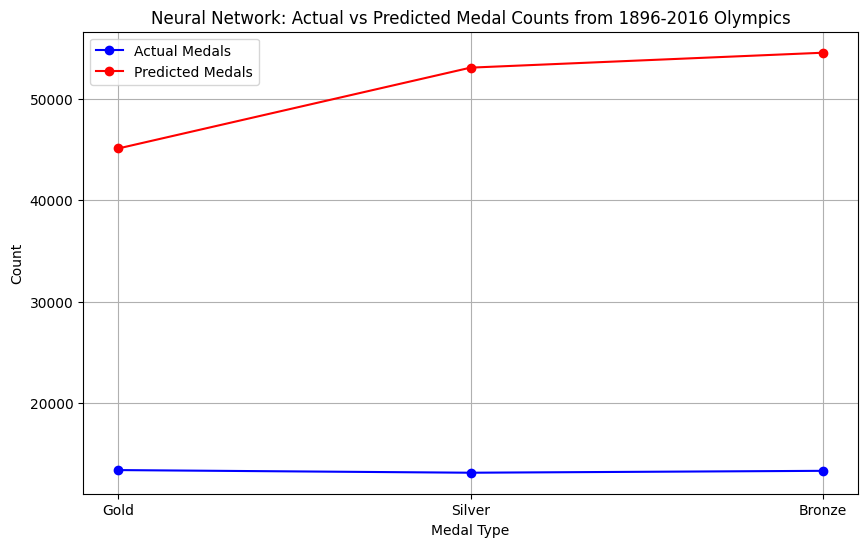

In [ ]:
import matplotlib.pyplot as plt

# Count the number of each type of medal in actual and predicted data
actual_medal_counts = DATA_nn['Medal'].value_counts().reindex(['Gold', 'Silver', 'Bronze'], fill_value=0)
predicted_medal_counts = DATA_nn['Predicted_Medal'].value_counts().reindex(['Gold', 'Silver', 'Bronze'], fill_value=0)

# Create a DataFrame for plotting
medal_comparison = pd.DataFrame({
    'Actual': actual_medal_counts,
    'Predicted': predicted_medal_counts
})

# Plot the line graph
plt.figure(figsize=(10, 6))
plt.plot(medal_comparison.index, medal_comparison['Actual'], marker='o', label='Actual Medals', color='blue')
plt.plot(medal_comparison.index, medal_comparison['Predicted'], marker='o', label='Predicted Medals', color='red')
plt.xlabel('Medal Type')
plt.ylabel('Count')
plt.title('Neural Network: Actual vs Predicted Medal Counts from 1896-2016 Olympics')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
DATA_ada = backup9.copy()

In [ ]:
import pandas as pd
import joblib
import sklearn
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer # Import the SimpleImputer

# Initialize the LabelEncoder
label_encoder = LabelEncoder()
scaler = StandardScaler()

# Fit the label encoder and then transform the data
DATA_ada['Sex'] = label_encoder.fit_transform(DATA_ada['Sex'])
DATA_ada['NOC'] = label_encoder.fit_transform(DATA_ada['NOC'])
DATA_ada['Season'] = label_encoder.fit_transform(DATA_ada['Season'])
DATA_ada['City'] = label_encoder.fit_transform(DATA_ada['City'])
DATA_ada['Event'] = label_encoder.fit_transform(DATA_ada['Event'])


#Select only the numeric columns for scaling
numeric_columns = DATA_ada.select_dtypes(include=['number']).columns

# Handle missing values using SimpleImputer
imputer = SimpleImputer(strategy='mean') # Initialize SimpleImputer with a strategy
DATA_ada[numeric_columns] = imputer.fit_transform(DATA_ada[numeric_columns]) # Impute missing values

# Scale the data using only numeric columns
DATA_ada_scaled = scaler.fit_transform(DATA_ada[numeric_columns])

#Ensure DATA_ada_scaled is a DataFrame with the same numeric columns
DATA_ada_scaled = pd.DataFrame(DATA_ada_scaled, columns=numeric_columns)

predictions_2024 = best_ada.predict(DATA_ada_scaled)

# Map the numeric predictions back to medal categories
medal_mapping = {3: 'NaN', 0: 'Bronze', 2: 'Silver', 1: 'Gold'}
predicted_medals = [medal_mapping[pred] for pred in predictions_2024]

# Add the predictions to the original dataframe
DATA_ada['Predicted_Medal'] = predicted_medals

# Display the first few rows of the dataframe with predictions
DATA_ada.head(50)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:458: UserWarning: X has feature names, but AdaBoostClassifier was fitted without feature names
  warnings.warn(


,Sex,Age,Height,Weight,NOC,Year,Season,City,Event,Medal,Predicted_Medal
113465,1.0,25.454776,175.338953,70.701778,81.0,1896.0,0.0,3.0,529.0,Gold,Silver
236410,1.0,23.000000,175.338953,70.701778,90.0,1896.0,0.0,3.0,698.0,Bronze,Silver
70118,1.0,18.000000,175.338953,70.701778,69.0,1896.0,0.0,3.0,258.0,Gold,Silver
82893,1.0,25.454776,175.338953,70.701778,81.0,1896.0,0.0,3.0,119.0,Silver,Silver
82822,1.0,22.000000,175.338953,70.701778,74.0,1896.0,0.0,3.0,77.0,Silver,Silver
22953,1.0,24.000000,175.338953,70.701778,216.0,1896.0,0.0,3.0,115.0,NaN,Gold
22952,1.0,24.000000,175.338953,70.701778,216.0,1896.0,0.0,3.0,70.0,Silver,Gold
70195,1.0,26.000000,175.338953,70.701778,79.0,1896.0,0.0,3.0,367.0,NaN,Silver
182918,1.0,17.000000,175.338953,70.701778,81.0,1896.0,0.0,3.0,698.0,Bronze,Silver
182919,1.0,17.000000,175.338953,70.701778,81.0,1896.0,0.0,3.0,696.0,NaN,Silver


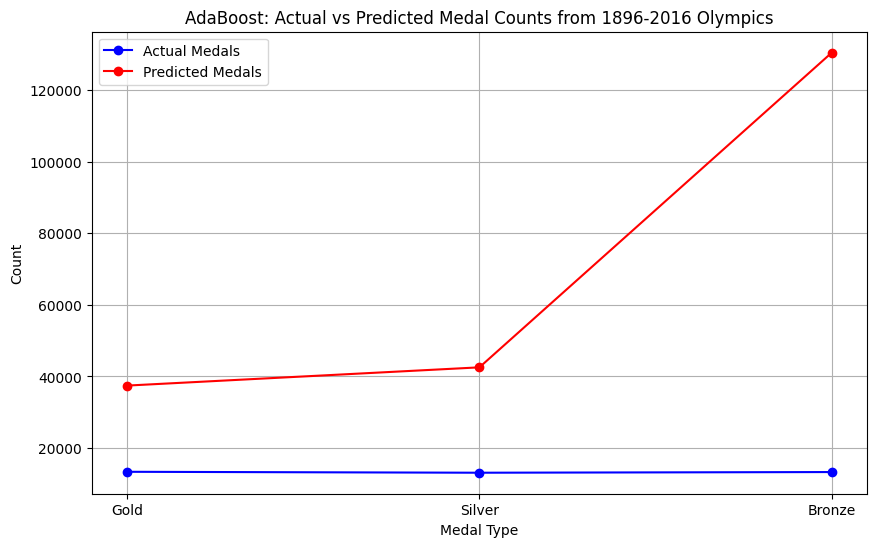

In [ ]:
import matplotlib.pyplot as plt

# Count the number of each type of medal in actual and predicted data
actual_medal_counts = DATA_ada['Medal'].value_counts().reindex(['Gold', 'Silver', 'Bronze'], fill_value=0)
predicted_medal_counts = DATA_ada['Predicted_Medal'].value_counts().reindex(['Gold', 'Silver', 'Bronze'], fill_value=0)

# Create a DataFrame for plotting
medal_comparison = pd.DataFrame({
    'Actual': actual_medal_counts,
    'Predicted': predicted_medal_counts
})

# Plot the line graph
plt.figure(figsize=(10, 6))
plt.plot(medal_comparison.index, medal_comparison['Actual'], marker='o', label='Actual Medals', color='blue')
plt.plot(medal_comparison.index, medal_comparison['Predicted'], marker='o', label='Predicted Medals', color='red')
plt.xlabel('Medal Type')
plt.ylabel('Count')
plt.title('AdaBoost: Actual vs Predicted Medal Counts from 1896-2016 Olympics')
plt.legend()
plt.grid(True)
plt.show()